
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

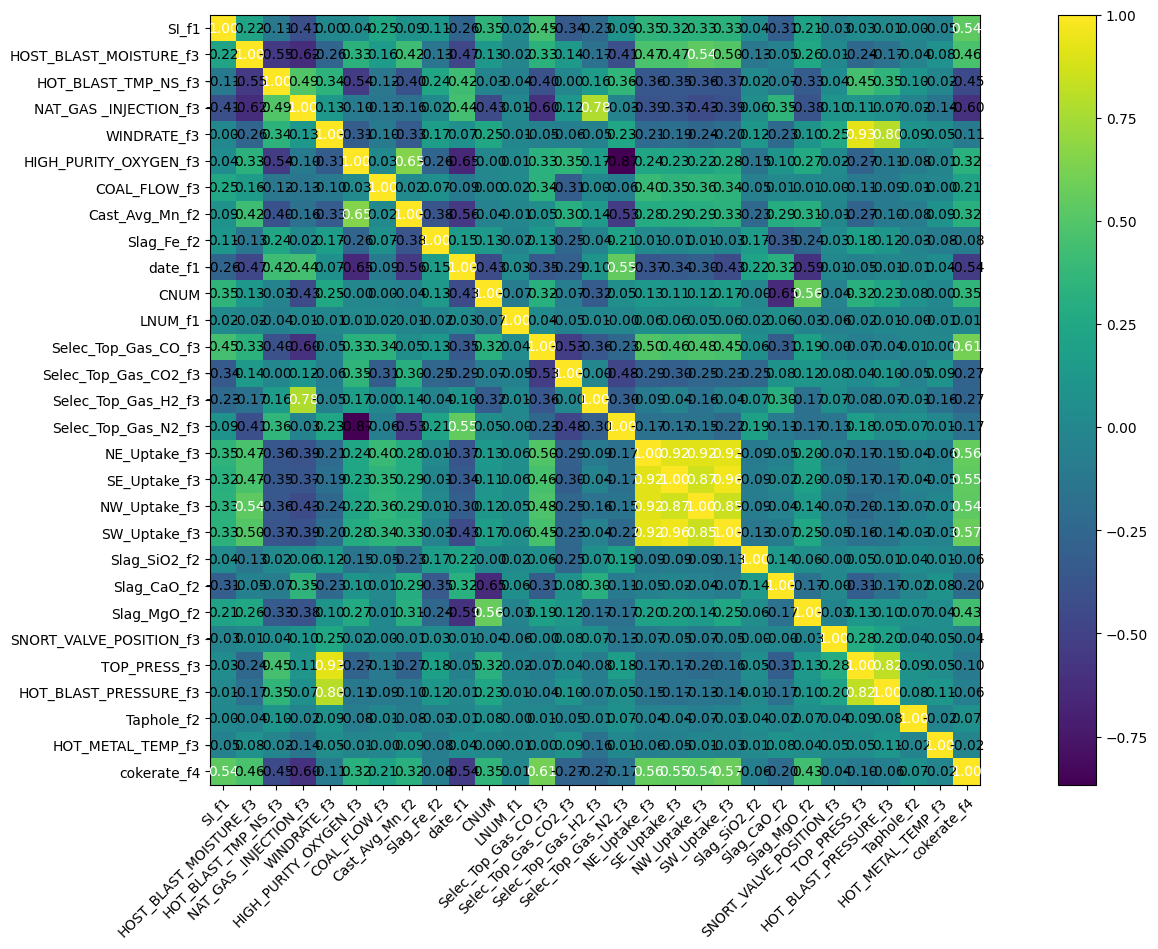

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

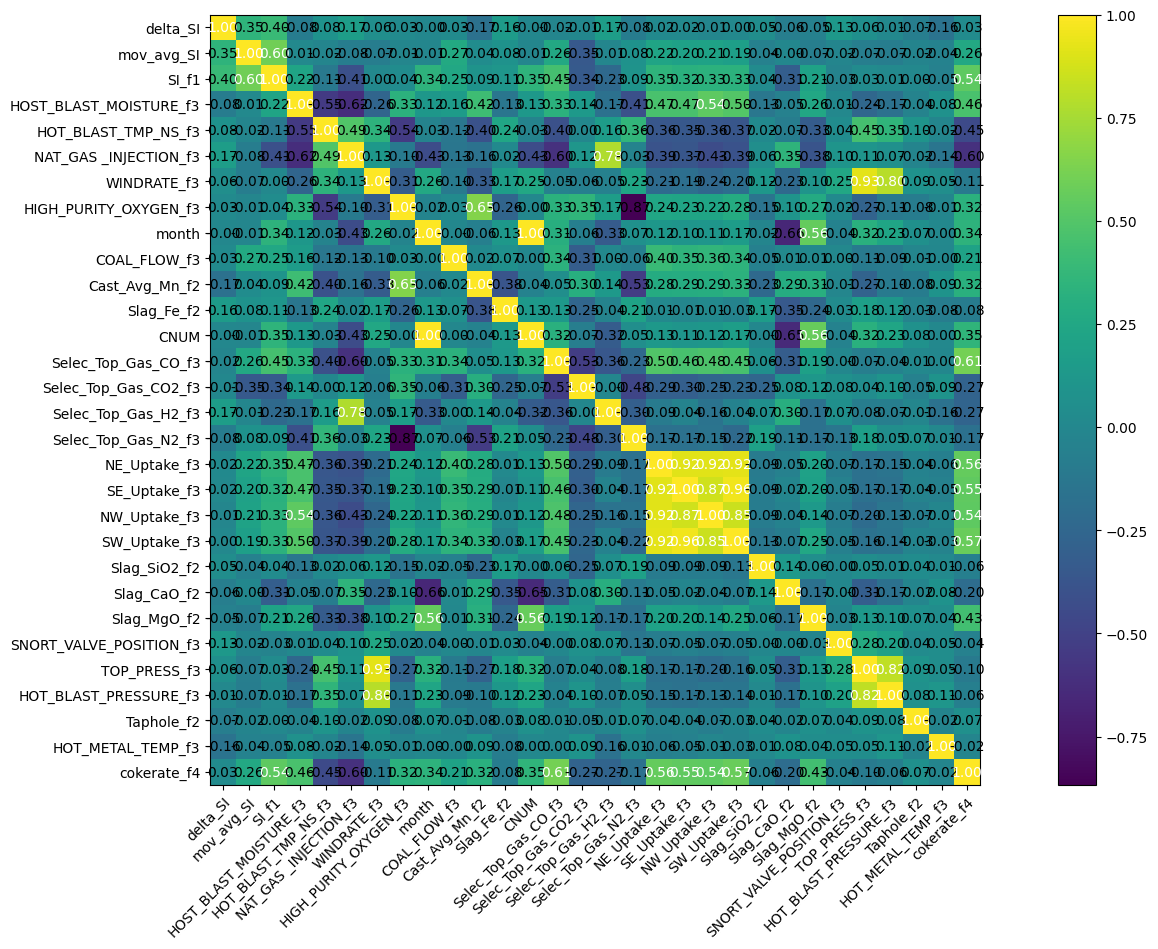

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 100 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test


In [24]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [25]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.141559
Loss_SI: 1.1245449781417847 Loss_all: 1.1351475715637207
===


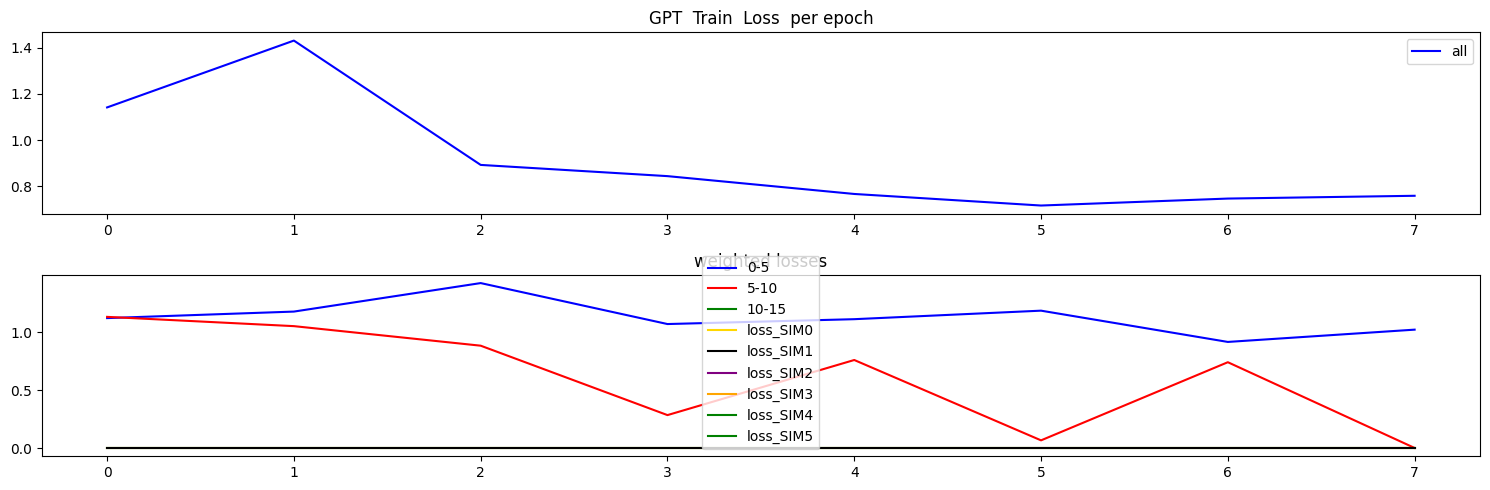

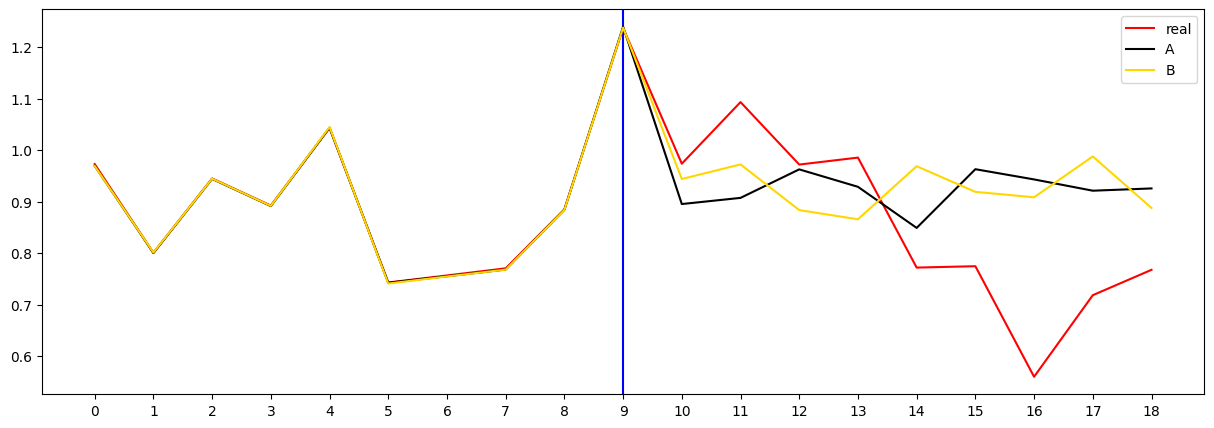

Which prediction is better? (A/B/skip): b
Saved preference.


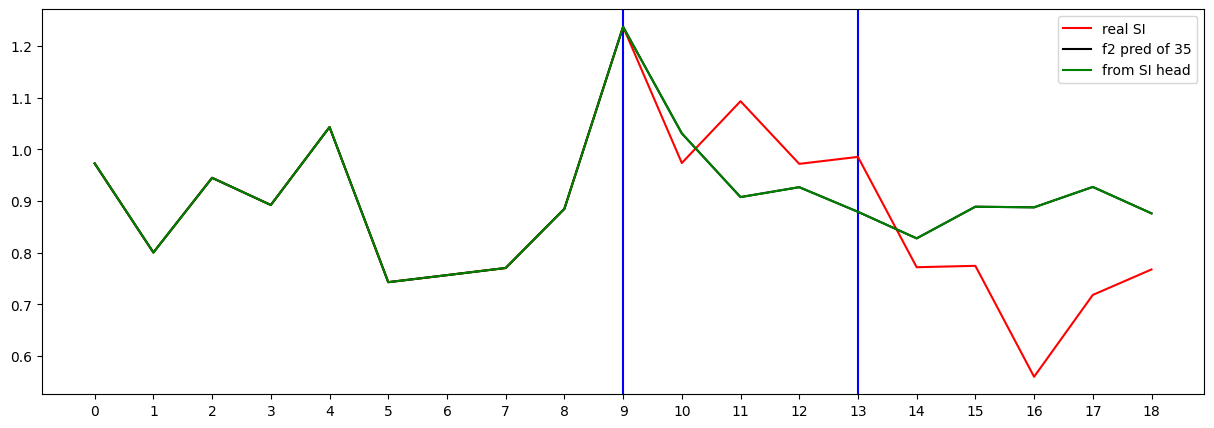

Testing R**2 - (all) - (no inputs):  0.9889966688923302
Testing R**2 - (f2) - SI full (no inputs):  0.130745804426602
Testing R**2 - SI head only (no inputs):  0.130745804426602
0 ...index R**2 (no inputs):  -0.506183875548097
1 ...index R**2 (no inputs):  -0.03670877346582335
2 ...index R**2 (no inputs):  0.130745804426602
3 ...index R**2 (no inputs):  -79.11221843029632
4 ...index R**2 (no inputs):  -40.185846258447064
5 ...index R**2 (no inputs):  -4499.85499776456
6 ...index R**2 (no inputs):  -14314.602928868882
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30045332197403884
10 ...index R**2 (no inputs):  0.25983187718401823
11 ...index R**2 (no inputs):  -86.57119492349045
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.051990931000195695
16 ...index R**2 (no inputs):  -0.24818355209625897
17 ...index R**2 (no inputs):  -87.2851499527706

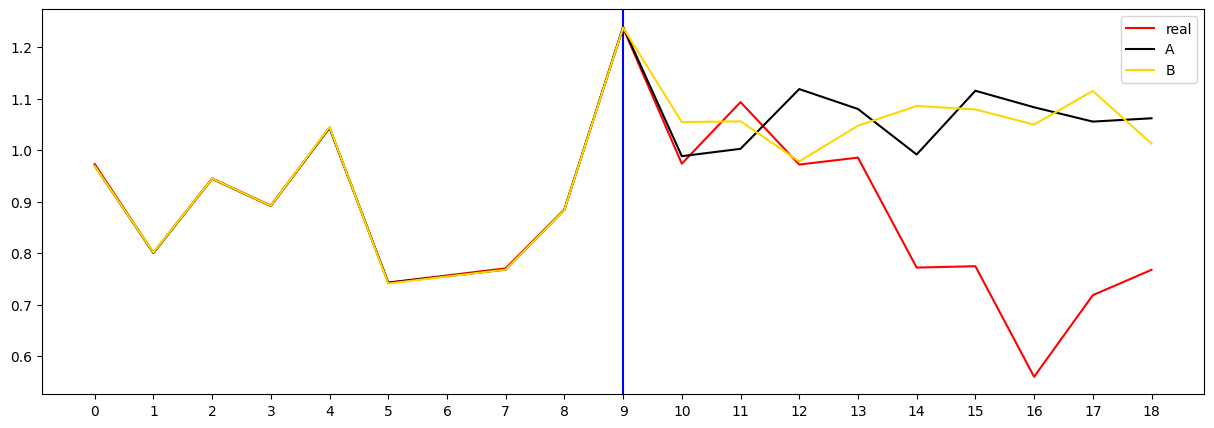

Which prediction is better? (A/B/skip): s


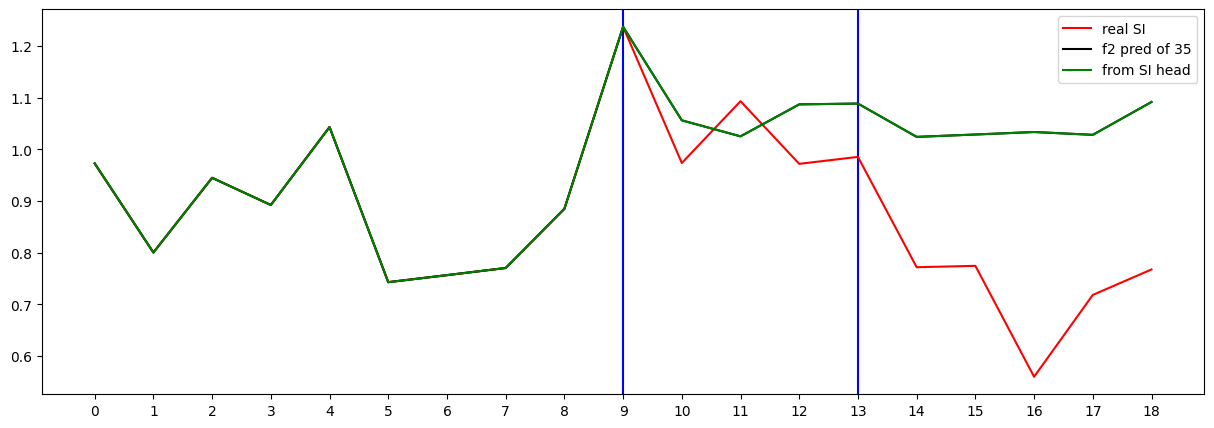

Testing R**2 - (all) - (no inputs):  0.970349202773156
Testing R**2 - (f2) - SI full (no inputs):  -1.542724194885356
Testing R**2 - SI head only (no inputs):  -1.542724194885356
0 ...index R**2 (no inputs):  -0.7228810405223478
1 ...index R**2 (no inputs):  -0.33954386121446856
2 ...index R**2 (no inputs):  -1.542724194885356
3 ...index R**2 (no inputs):  -98.0169368797756
4 ...index R**2 (no inputs):  -95.35699453396742
5 ...index R**2 (no inputs):  -12093.402655391044
6 ...index R**2 (no inputs):  -13899.22927630533
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.7458254596547031
10 ...index R**2 (no inputs):  -5.157183514558213
11 ...index R**2 (no inputs):  -52.188442921642675
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7814770635793127
16 ...index R**2 (no inputs):  -0.2371465328260749
17 ...index R**2 (no inputs):  -260.2241347642398

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences


res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.251108
Loss_SI: 1.2286875247955322 Loss_all: 1.2444771528244019
===


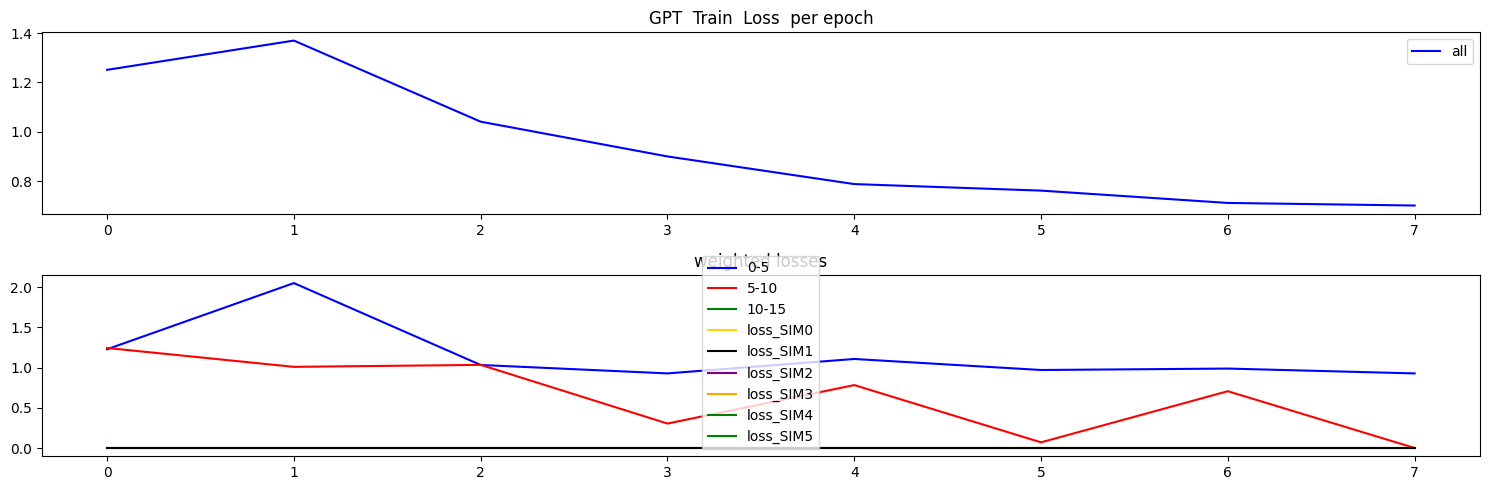

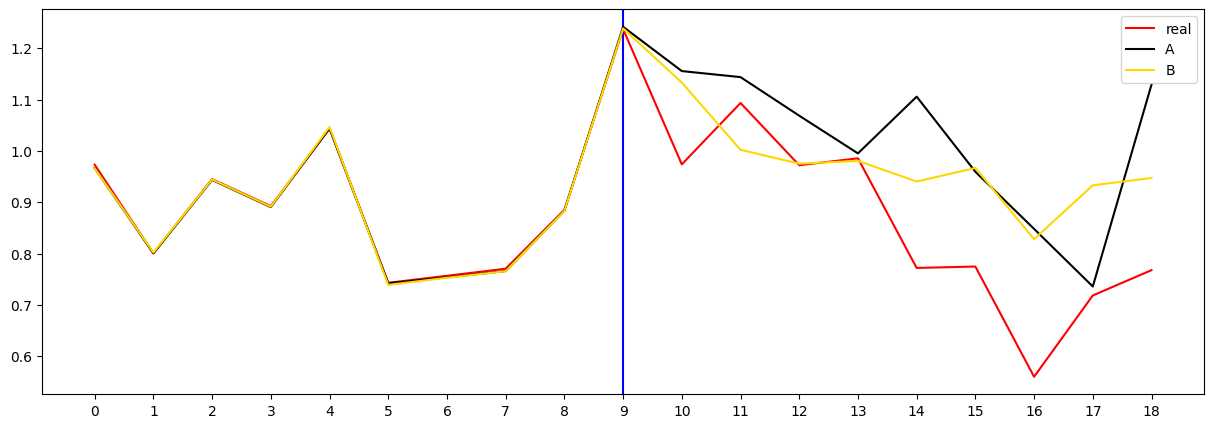

Which prediction is better? (A/B/skip): b
Saved preference.


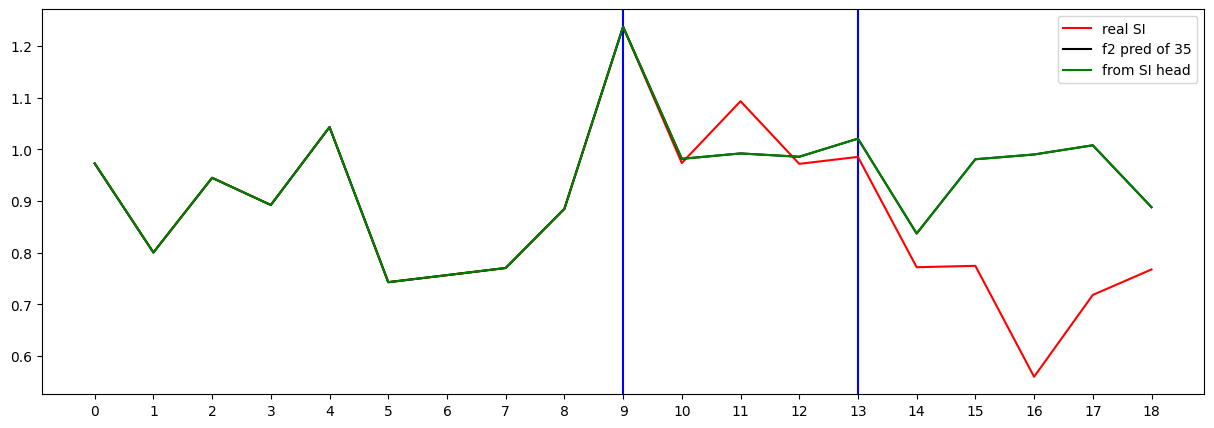

Testing R**2 - (all) - (no inputs):  0.9937398487486033
Testing R**2 - (f2) - SI full (no inputs):  -0.7353676503256295
Testing R**2 - SI head only (no inputs):  -0.7353676503256295
0 ...index R**2 (no inputs):  -0.0927833576575936
1 ...index R**2 (no inputs):  -1.3177699140273864
2 ...index R**2 (no inputs):  -0.7353676503256295
3 ...index R**2 (no inputs):  -343.1362665544365
4 ...index R**2 (no inputs):  -158.9783291675701
5 ...index R**2 (no inputs):  -2523.3829448408646
6 ...index R**2 (no inputs):  -28316.1291517079
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.2538190343241218
10 ...index R**2 (no inputs):  -0.38341972653187617
11 ...index R**2 (no inputs):  -660.0629173208008
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8298745602654187
16 ...index R**2 (no inputs):  -0.5874197599717184
17 ...index R**2 (no inputs):  -325.1929806835

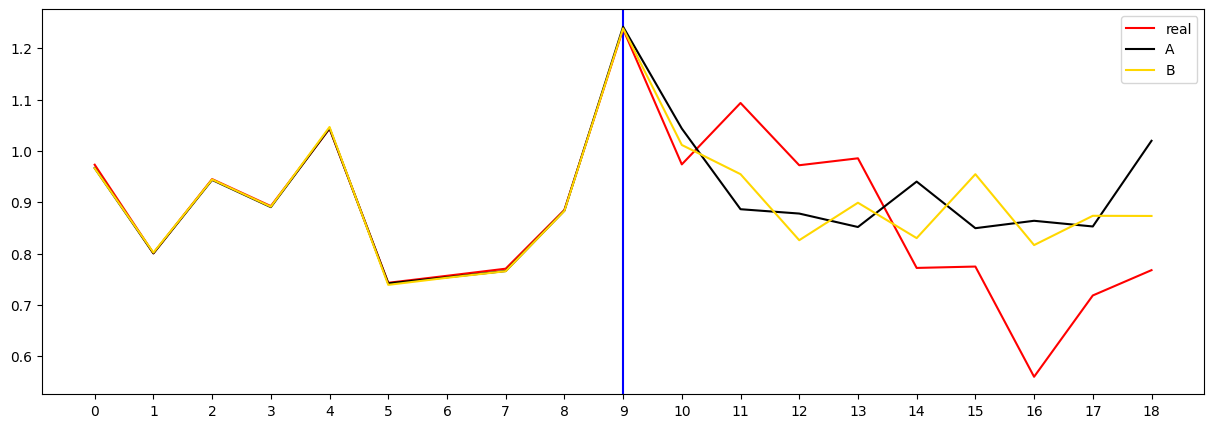

Which prediction is better? (A/B/skip): b
Saved preference.


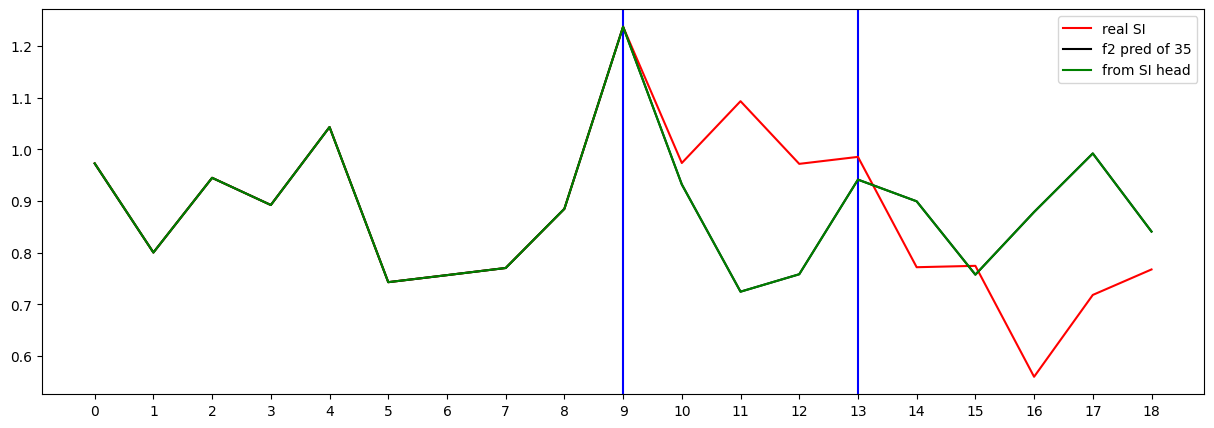

Testing R**2 - (all) - (no inputs):  0.9804223512012515
Testing R**2 - (f2) - SI full (no inputs):  -0.3880412280636778
Testing R**2 - SI head only (no inputs):  -0.3880412280636778
0 ...index R**2 (no inputs):  0.019498071548823437
1 ...index R**2 (no inputs):  -1.2656101697140012
2 ...index R**2 (no inputs):  -0.3880412280636778
3 ...index R**2 (no inputs):  -1341.677281600597
4 ...index R**2 (no inputs):  -2169.3105174413936
5 ...index R**2 (no inputs):  -7824.869343371537
6 ...index R**2 (no inputs):  -63128.59131647497
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.063786034351187
10 ...index R**2 (no inputs):  -1.3511717606515599
11 ...index R**2 (no inputs):  -741.8096845612498
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.495775088553566
16 ...index R**2 (no inputs):  -0.661313898298294
17 ...index R**2 (no inputs):  -119.95545654700

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.170227
Loss_SI: 1.1007441282272339 Loss_all: 1.1636571884155273
===


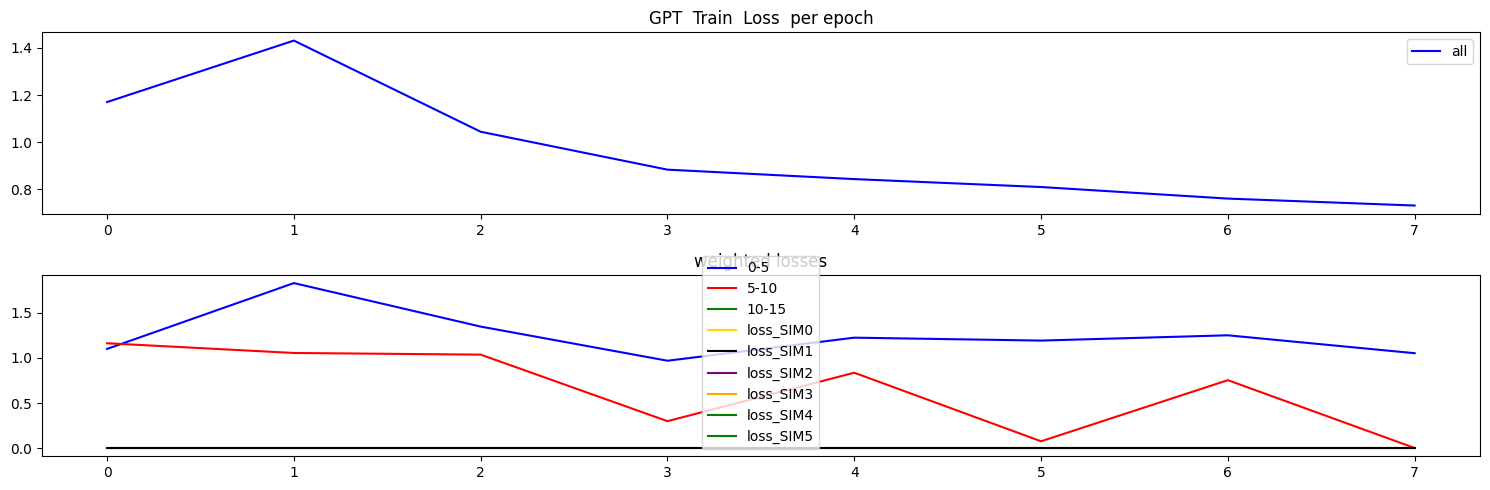

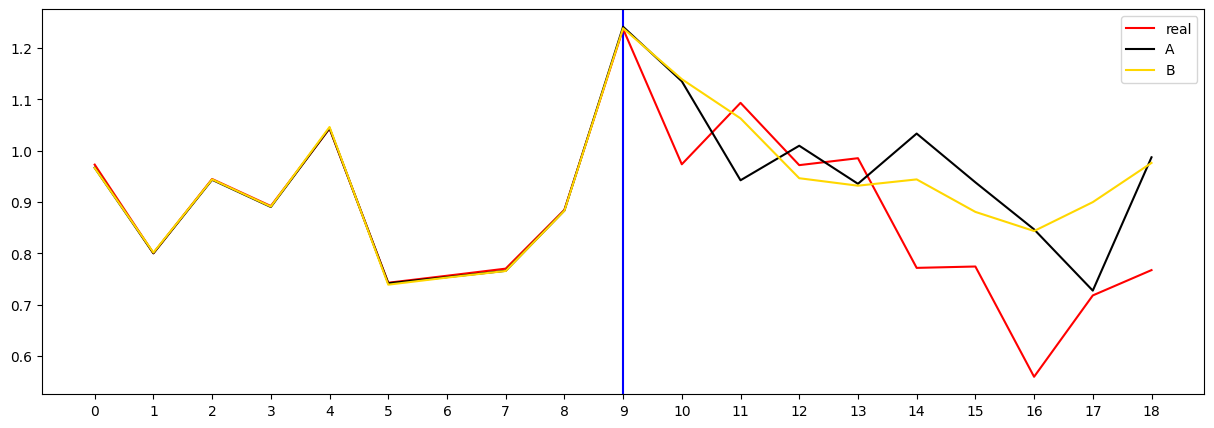

Which prediction is better? (A/B/skip): s


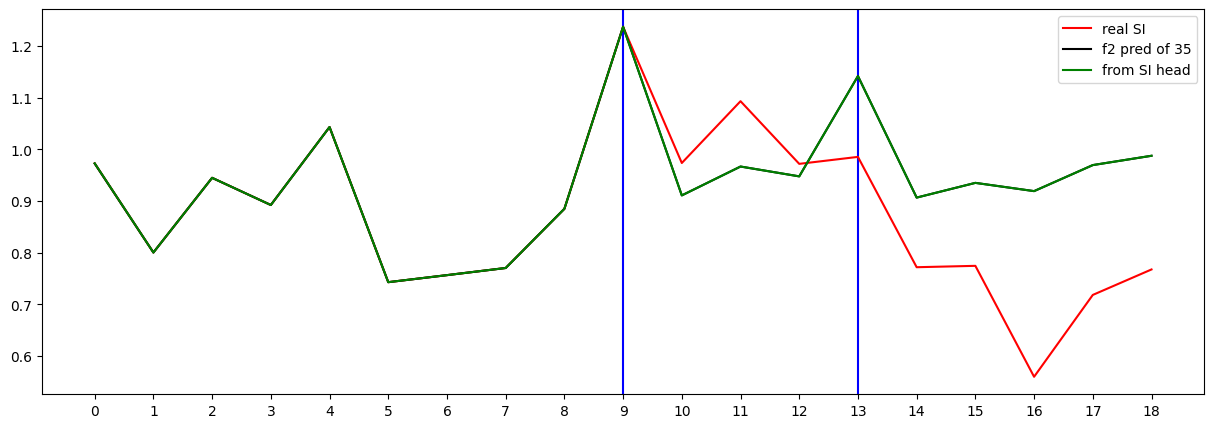

Testing R**2 - (all) - (no inputs):  0.9928088784072949
Testing R**2 - (f2) - SI full (no inputs):  -0.8077447485339513
Testing R**2 - SI head only (no inputs):  -0.8077447485339513
0 ...index R**2 (no inputs):  0.08548723098772992
1 ...index R**2 (no inputs):  -0.8345328135622536
2 ...index R**2 (no inputs):  -0.8077447485339513
3 ...index R**2 (no inputs):  -689.426647296968
4 ...index R**2 (no inputs):  -244.23112000516846
5 ...index R**2 (no inputs):  -2879.5418735167473
6 ...index R**2 (no inputs):  -25002.64667252382
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0511835421763418
10 ...index R**2 (no inputs):  -0.26252806777149185
11 ...index R**2 (no inputs):  -387.17130547576056
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.40211464590825186
16 ...index R**2 (no inputs):  -0.2728274054291868
17 ...index R**2 (no inputs):  -680.355631

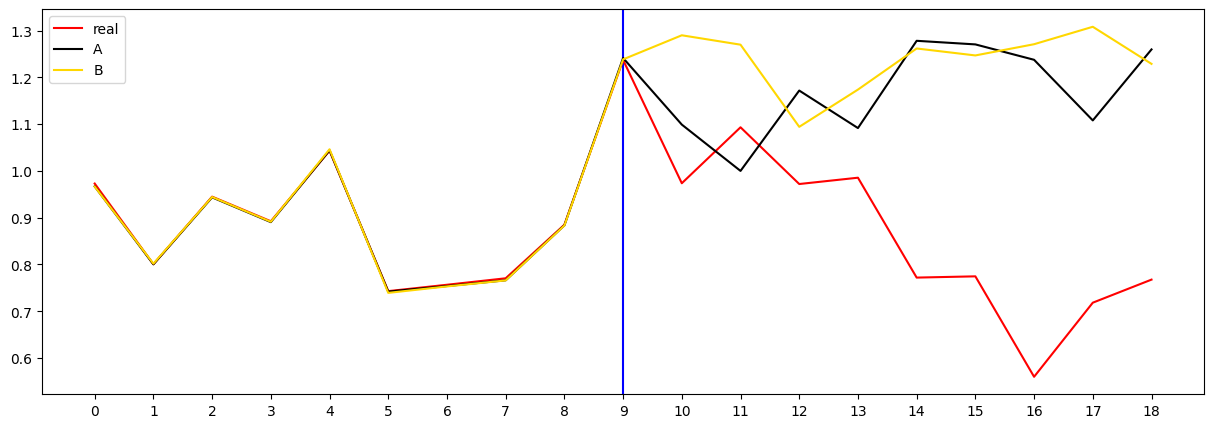

Which prediction is better? (A/B/skip): a
Saved preference.


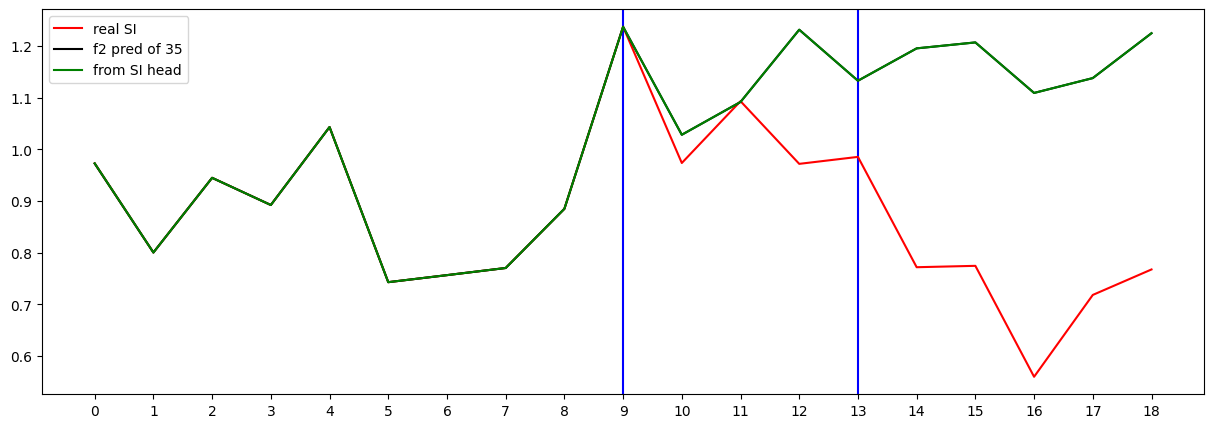

Testing R**2 - (all) - (no inputs):  0.9925958329508927
Testing R**2 - (f2) - SI full (no inputs):  -4.093926013339321
Testing R**2 - SI head only (no inputs):  -4.093926013339321
0 ...index R**2 (no inputs):  -0.34678916639285173
1 ...index R**2 (no inputs):  -1.0553681572046103
2 ...index R**2 (no inputs):  -4.093926013339321
3 ...index R**2 (no inputs):  -6718.550971186754
4 ...index R**2 (no inputs):  -271.6335164197157
5 ...index R**2 (no inputs):  -2632.0527816338
6 ...index R**2 (no inputs):  -12704.456075410051
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.83759279384839
10 ...index R**2 (no inputs):  -2.5703993610281697
11 ...index R**2 (no inputs):  -1319.0087652576092
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9915906062951689
16 ...index R**2 (no inputs):  0.05402903500320588
17 ...index R**2 (no inputs):  -4299.790250208135


In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.356930
Loss_SI: 1.5105746984481812 Loss_all: 1.350311279296875
===


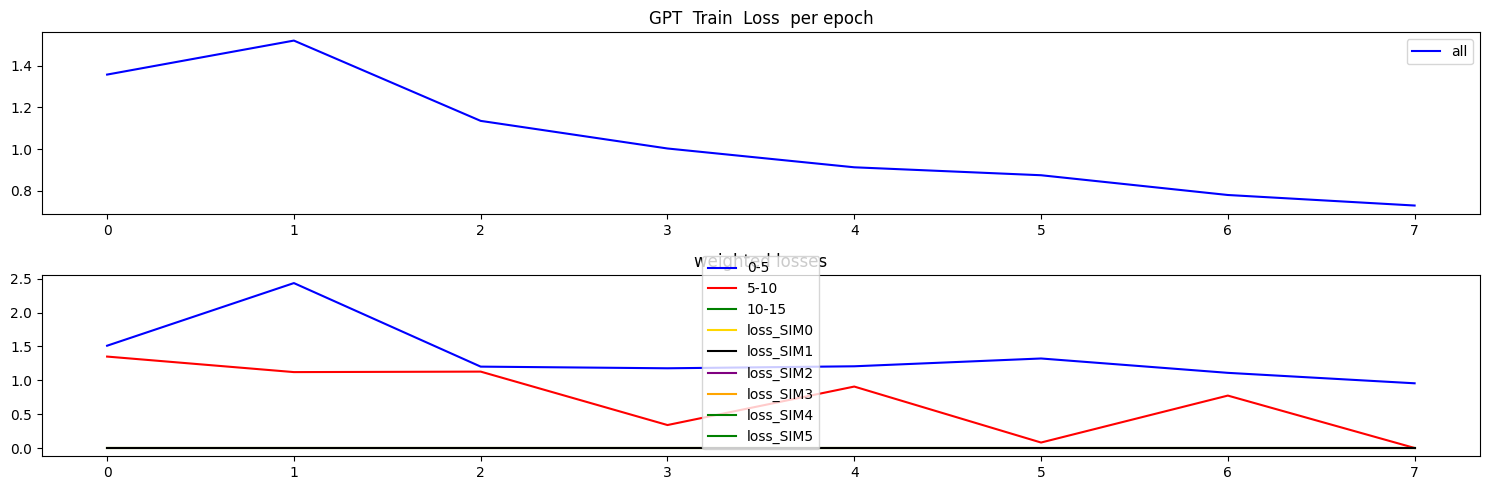

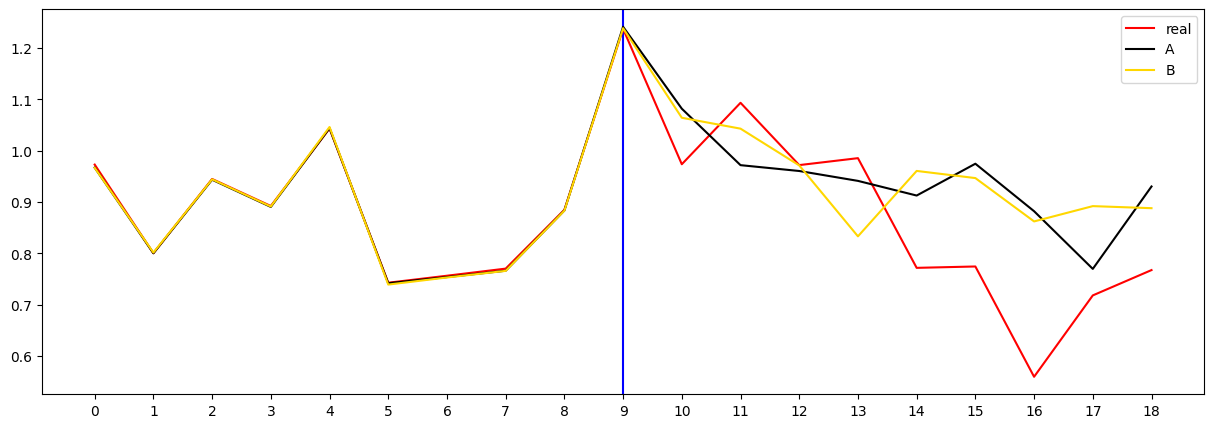

Which prediction is better? (A/B/skip): s


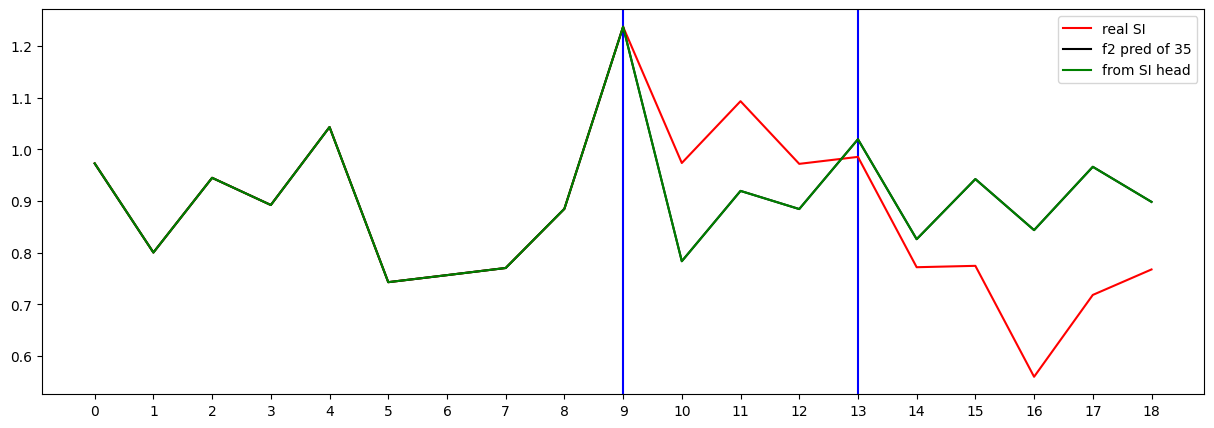

Testing R**2 - (all) - (no inputs):  0.9934392368958561
Testing R**2 - (f2) - SI full (no inputs):  -0.6704330419227307
Testing R**2 - SI head only (no inputs):  -0.6704330419227307
0 ...index R**2 (no inputs):  0.18705476815390465
1 ...index R**2 (no inputs):  -1.0168360550276168
2 ...index R**2 (no inputs):  -0.6704330419227307
3 ...index R**2 (no inputs):  -384.5229273273564
4 ...index R**2 (no inputs):  -246.8190625910138
5 ...index R**2 (no inputs):  -2641.230985667851
6 ...index R**2 (no inputs):  -39196.53098185279
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5014688488136345
10 ...index R**2 (no inputs):  -0.22197005872222197
11 ...index R**2 (no inputs):  -321.97294159973694
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.36555177597602806
16 ...index R**2 (no inputs):  -0.26486744251674166
17 ...index R**2 (no inputs):  -335.374402

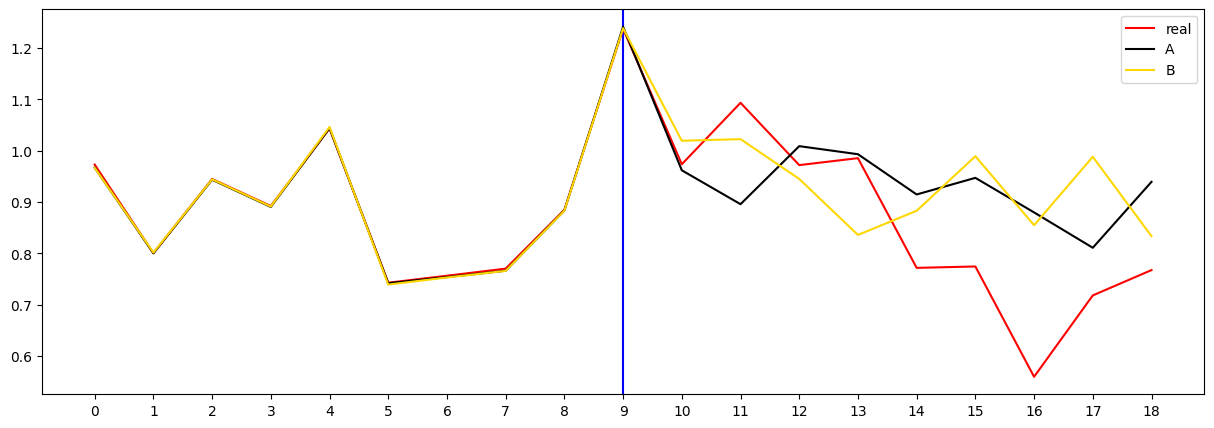

Which prediction is better? (A/B/skip): s


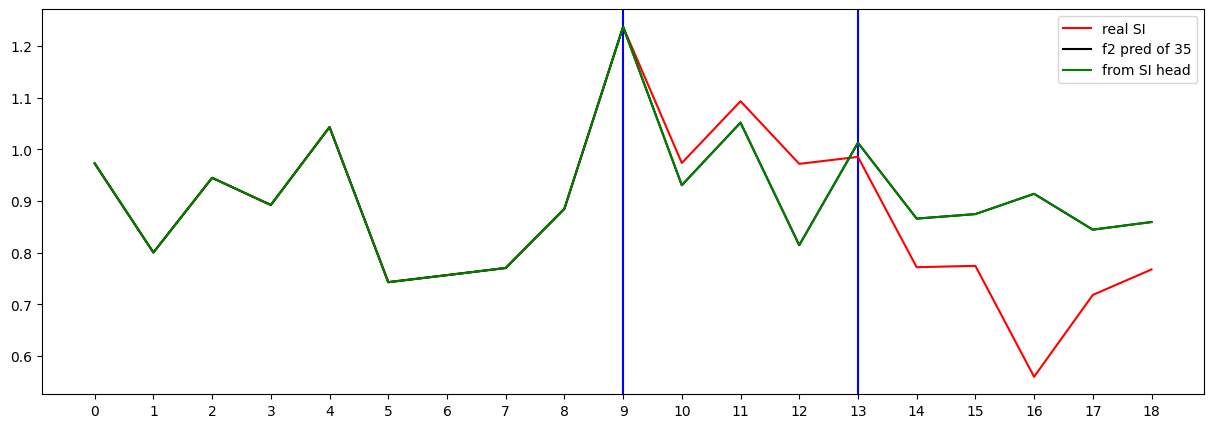

Testing R**2 - (all) - (no inputs):  0.9908727184664363
Testing R**2 - (f2) - SI full (no inputs):  -0.2513531762033936
Testing R**2 - SI head only (no inputs):  -0.2513531762033936
0 ...index R**2 (no inputs):  0.10519644513383242
1 ...index R**2 (no inputs):  -0.2618317099616392
2 ...index R**2 (no inputs):  -0.2513531762033936
3 ...index R**2 (no inputs):  -337.69902257311674
4 ...index R**2 (no inputs):  -884.7457775697484
5 ...index R**2 (no inputs):  -3477.4894762215313
6 ...index R**2 (no inputs):  -37483.94572965157
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.223753067814251
10 ...index R**2 (no inputs):  -1.7870298201768229
11 ...index R**2 (no inputs):  -125.35036372555166
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.8342077103878327
16 ...index R**2 (no inputs):  -0.49889494178034877
17 ...index R**2 (no inputs):  -1139.071879

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.296696
Loss_SI: 1.3274959325790405 Loss_all: 1.2900770902633667
===


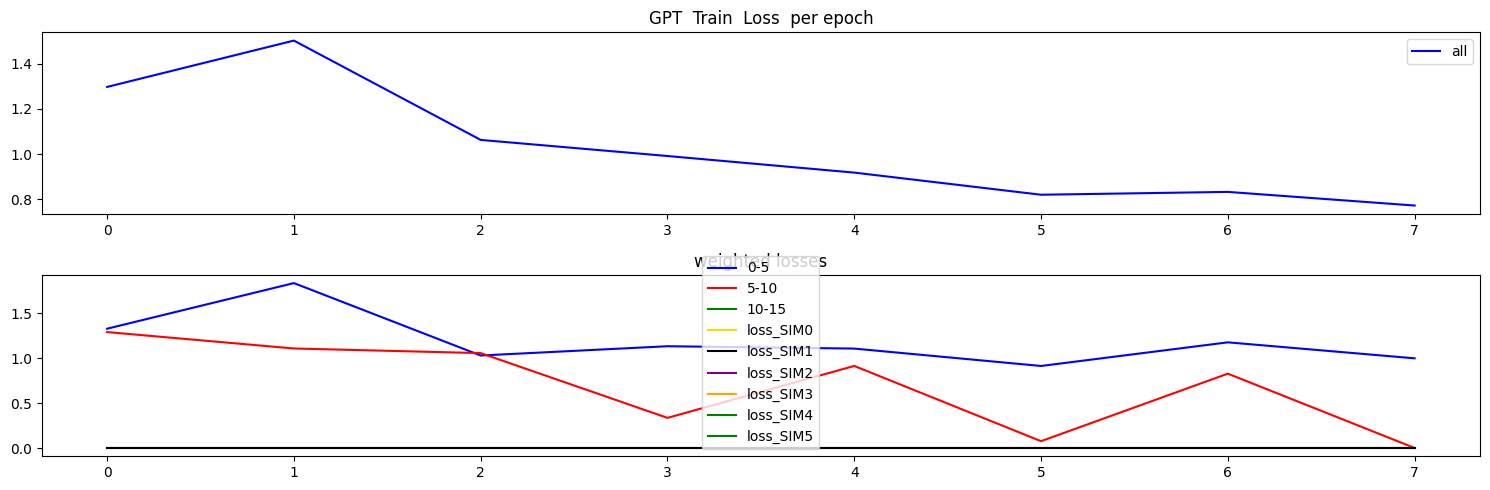

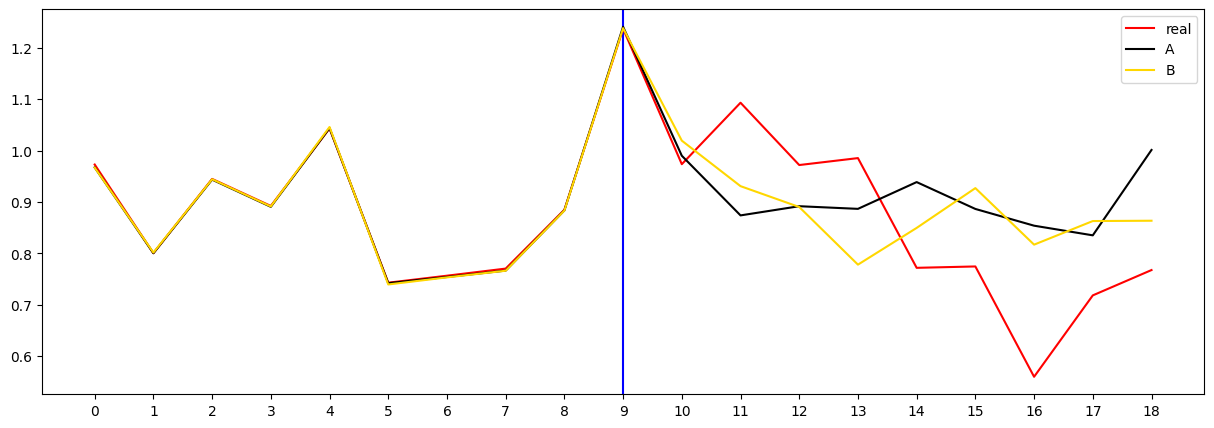

Which prediction is better? (A/B/skip): s


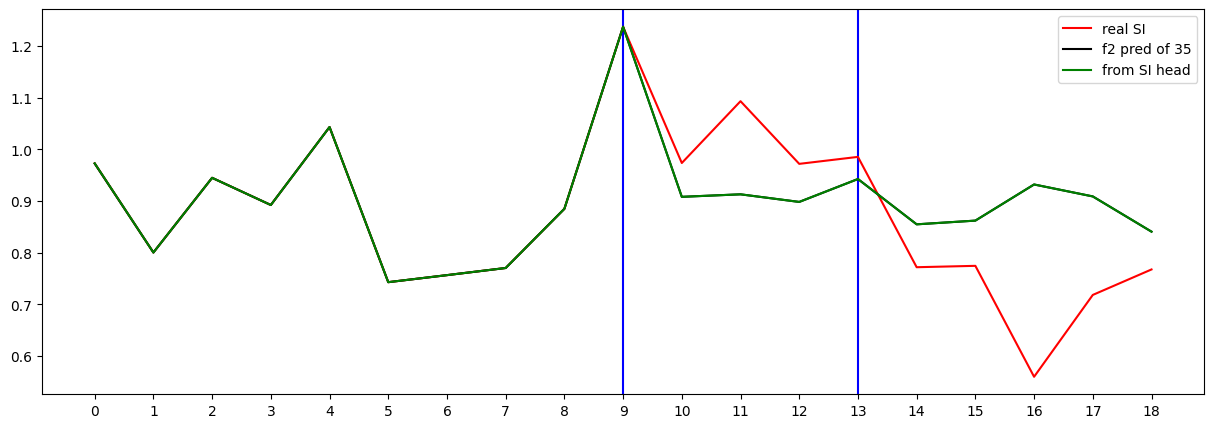

Testing R**2 - (all) - (no inputs):  0.9961152015669945
Testing R**2 - (f2) - SI full (no inputs):  -0.12293146537251731
Testing R**2 - SI head only (no inputs):  -0.12293146537251731
0 ...index R**2 (no inputs):  -0.14079686693338367
1 ...index R**2 (no inputs):  -0.850616899643736
2 ...index R**2 (no inputs):  -0.12293146537251731
3 ...index R**2 (no inputs):  -577.6821017544648
4 ...index R**2 (no inputs):  -56.82244009638015
5 ...index R**2 (no inputs):  -1523.217508353398
6 ...index R**2 (no inputs):  -43930.18411824694
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6563143358957568
10 ...index R**2 (no inputs):  -0.4458418180698871
11 ...index R**2 (no inputs):  -663.5541174752692
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6961118818914431
16 ...index R**2 (no inputs):  -0.16207957325821298
17 ...index R**2 (no inputs):  -517.351638

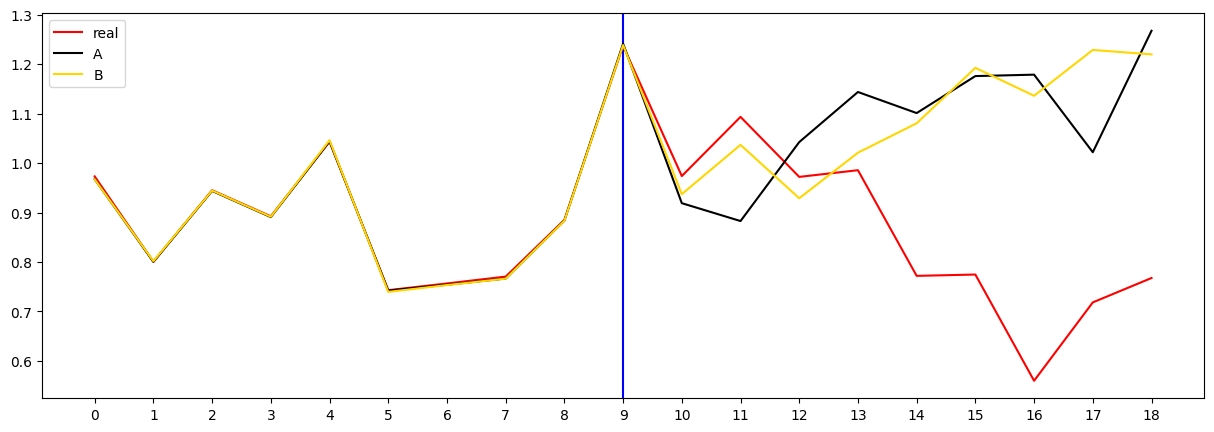

Which prediction is better? (A/B/skip): b
Saved preference.


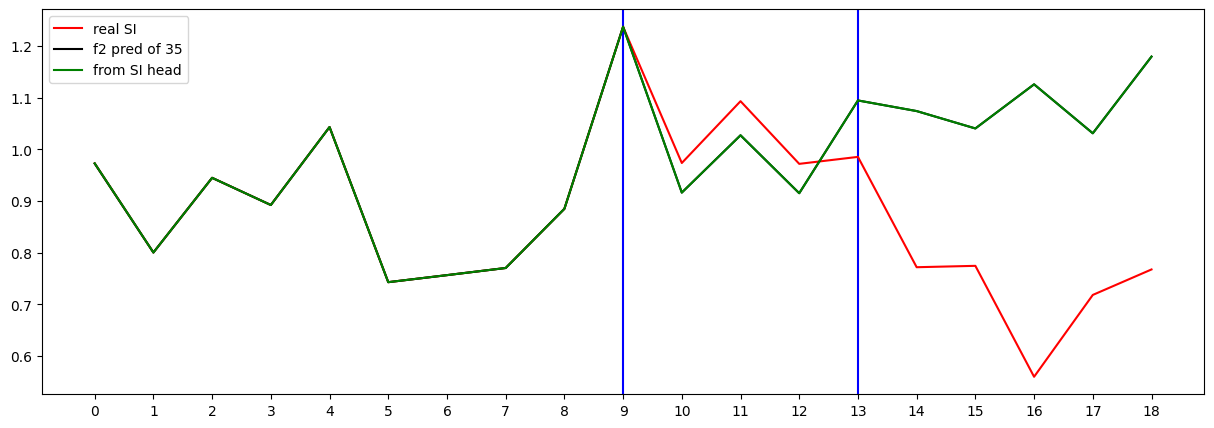

Testing R**2 - (all) - (no inputs):  0.9717277094878481
Testing R**2 - (f2) - SI full (no inputs):  -2.263703627617921
Testing R**2 - SI head only (no inputs):  -2.263703627617921
0 ...index R**2 (no inputs):  -0.1712428655607412
1 ...index R**2 (no inputs):  -1.6595358318356892
2 ...index R**2 (no inputs):  -2.263703627617921
3 ...index R**2 (no inputs):  -3366.0471454859485
4 ...index R**2 (no inputs):  -729.1260915187281
5 ...index R**2 (no inputs):  -11166.35583272489
6 ...index R**2 (no inputs):  -27195.926701789394
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.4738187563524034
10 ...index R**2 (no inputs):  -3.8502580665568784
11 ...index R**2 (no inputs):  -113.42116066371965
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.640336069812559
16 ...index R**2 (no inputs):  -1.2802535849993957
17 ...index R**2 (no inputs):  -4324.9410174007

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [31]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.158113
Loss_SI: 1.3738845586776733 Loss_all: 1.1514134407043457
===


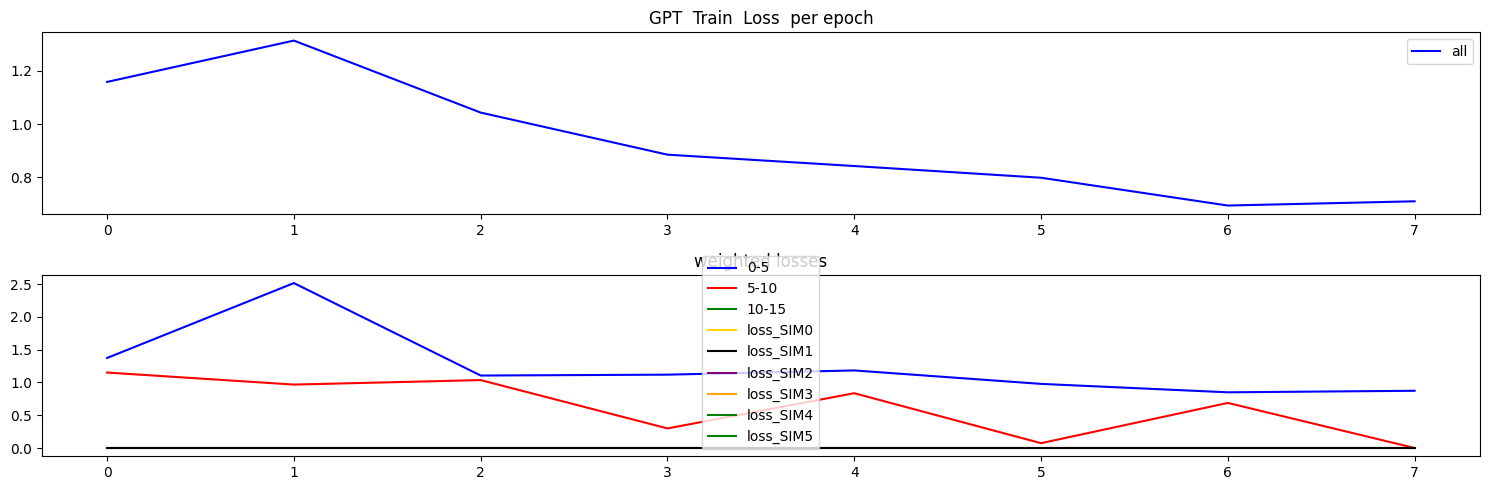

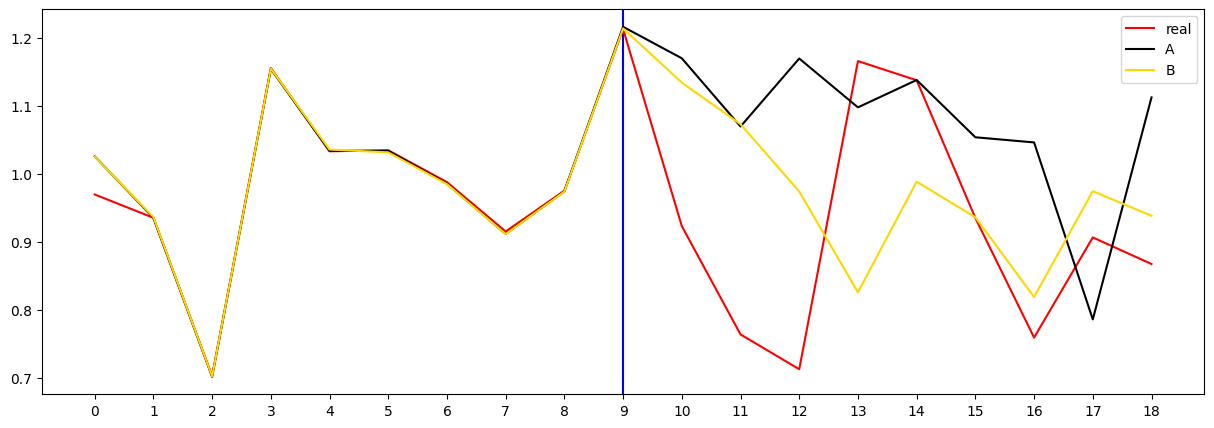

Which prediction is better? (A/B/skip): s


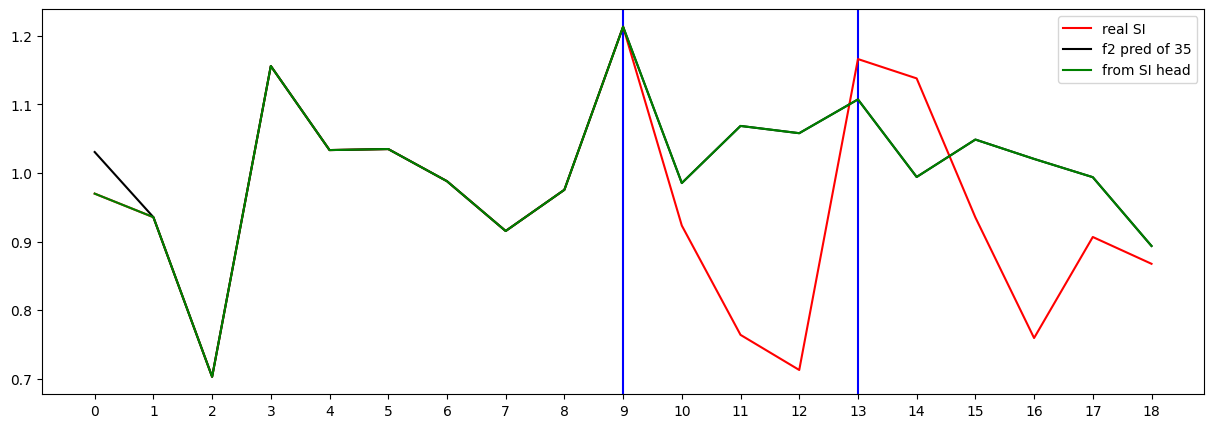

Testing R**2 - (all) - (no inputs):  0.9939921462249358
Testing R**2 - (f2) - SI full (no inputs):  -0.5029203385545982
Testing R**2 - SI head only (no inputs):  -0.5029203385545982
0 ...index R**2 (no inputs):  0.188903873190438
1 ...index R**2 (no inputs):  -0.8157566328086192
2 ...index R**2 (no inputs):  -0.5029203385545982
3 ...index R**2 (no inputs):  0.16289065508735423
4 ...index R**2 (no inputs):  -0.9208345431858105
5 ...index R**2 (no inputs):  -1.2060165667992617
6 ...index R**2 (no inputs):  -4.611610472162694
7 ...index R**2 (no inputs):  -0.12464997297971325
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.41768967527570244
10 ...index R**2 (no inputs):  -0.31056273904053167
11 ...index R**2 (no inputs):  -169.27517086694004
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.2639989184583442
16 ...index R**2 (no inputs):  -0.7934689352646729
17 ...index R**2 (no input

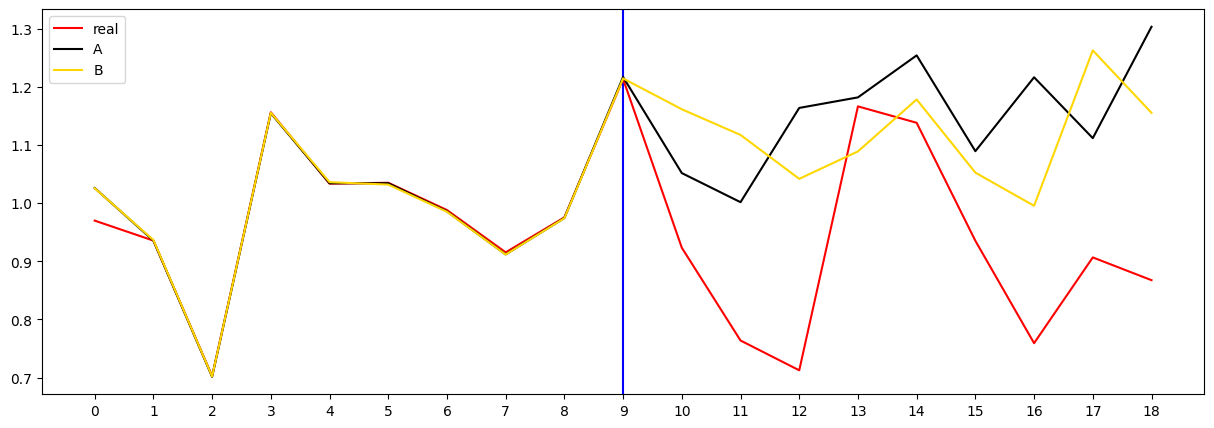

Which prediction is better? (A/B/skip): s


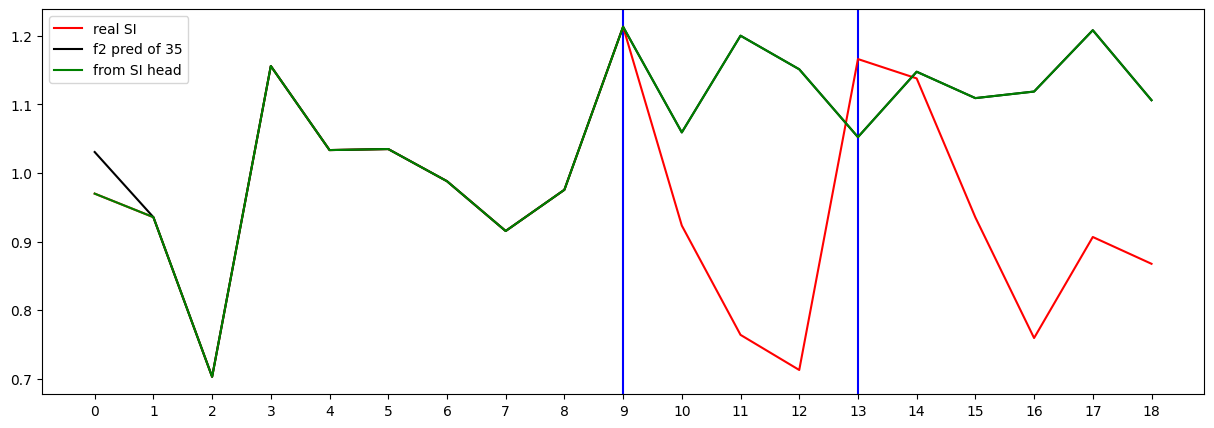

Testing R**2 - (all) - (no inputs):  0.9722150525211606
Testing R**2 - (f2) - SI full (no inputs):  -2.2912843081160617
Testing R**2 - SI head only (no inputs):  -2.2912843081160617
0 ...index R**2 (no inputs):  -0.3850311595701432
1 ...index R**2 (no inputs):  -1.2737251350998813
2 ...index R**2 (no inputs):  -2.2912843081160617
3 ...index R**2 (no inputs):  -20.056939612293093
4 ...index R**2 (no inputs):  -13.923172265145011
5 ...index R**2 (no inputs):  -9.302702927432858
6 ...index R**2 (no inputs):  -11.191371541307689
7 ...index R**2 (no inputs):  -0.12553747573528606
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3017293439779252
10 ...index R**2 (no inputs):  -1.2256959565981593
11 ...index R**2 (no inputs):  -88.61898291586415
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7350659678322728
16 ...index R**2 (no inputs):  -0.982489466234753
17 ...index R**2 (no inputs

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.152206
Loss_SI: 1.3460994958877563 Loss_all: 1.1454905271530151
===


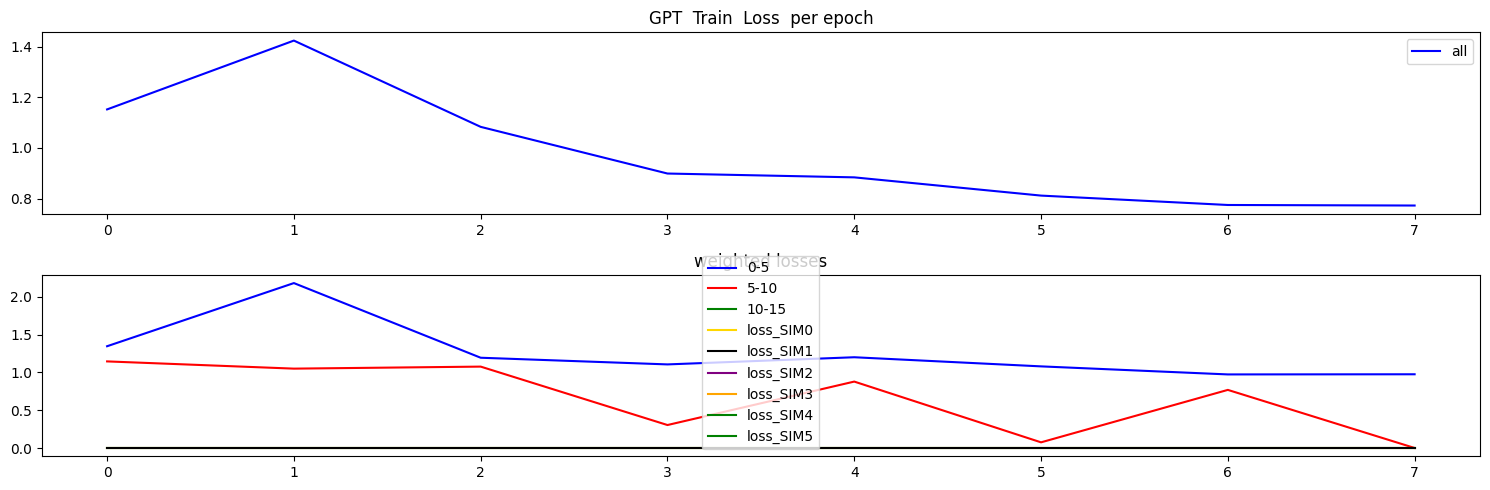

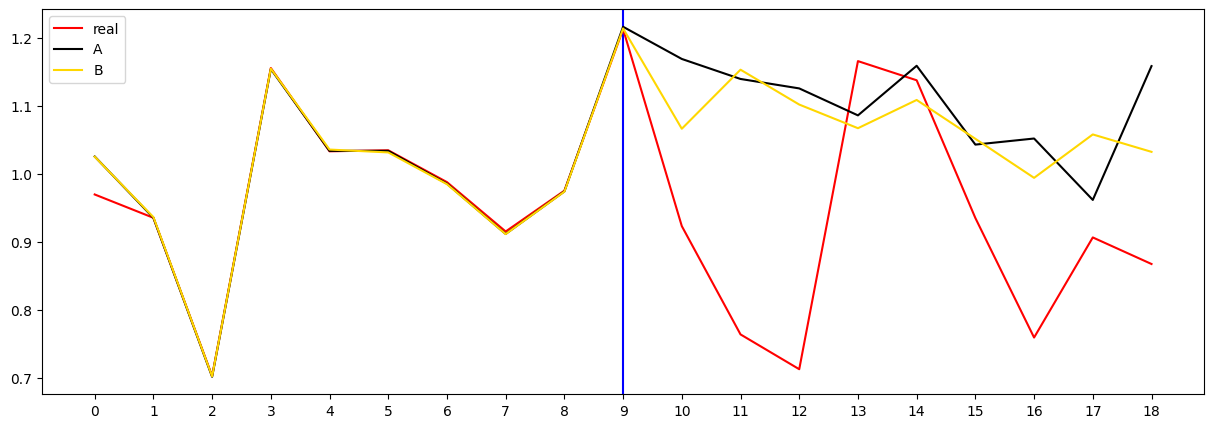

Which prediction is better? (A/B/skip): s


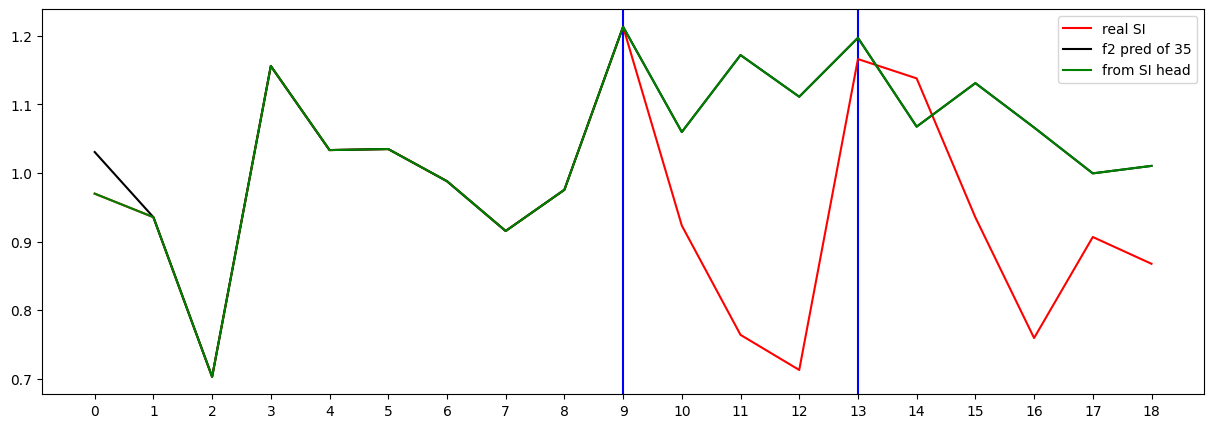

Testing R**2 - (all) - (no inputs):  0.991151874523843
Testing R**2 - (f2) - SI full (no inputs):  -1.446690902305058
Testing R**2 - SI head only (no inputs):  -1.446690902305058
0 ...index R**2 (no inputs):  0.2542826425096043
1 ...index R**2 (no inputs):  -0.769052985554824
2 ...index R**2 (no inputs):  -1.446690902305058
3 ...index R**2 (no inputs):  -1.4195228215812872
4 ...index R**2 (no inputs):  -3.56919372263042
5 ...index R**2 (no inputs):  -2.2977551638128615
6 ...index R**2 (no inputs):  -4.942236757406872
7 ...index R**2 (no inputs):  -0.12464190694007904
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.40186958319015
10 ...index R**2 (no inputs):  -0.1707858146641097
11 ...index R**2 (no inputs):  -64.51213363464018
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.15659548873803675
16 ...index R**2 (no inputs):  -0.8619207877105117
17 ...index R**2 (no inputs):  -225.

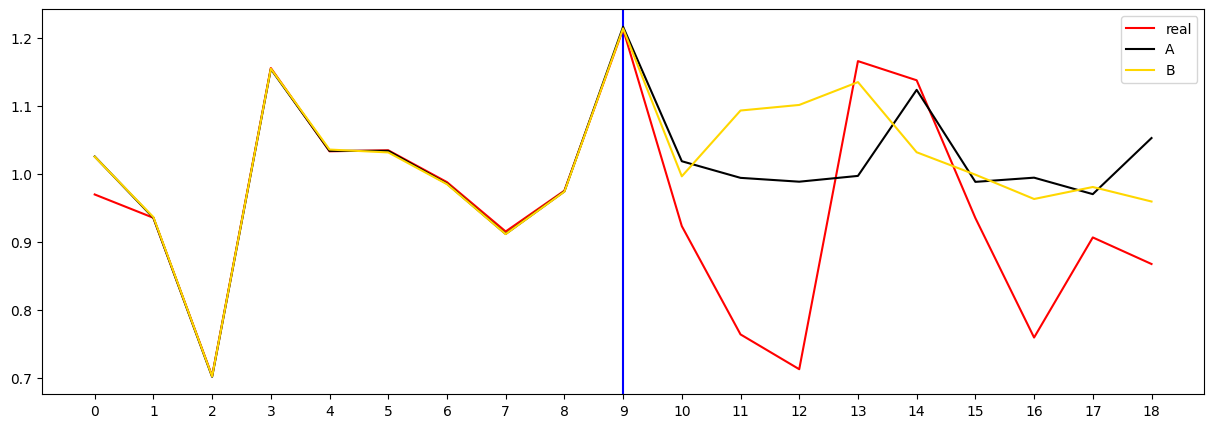

Which prediction is better? (A/B/skip): s


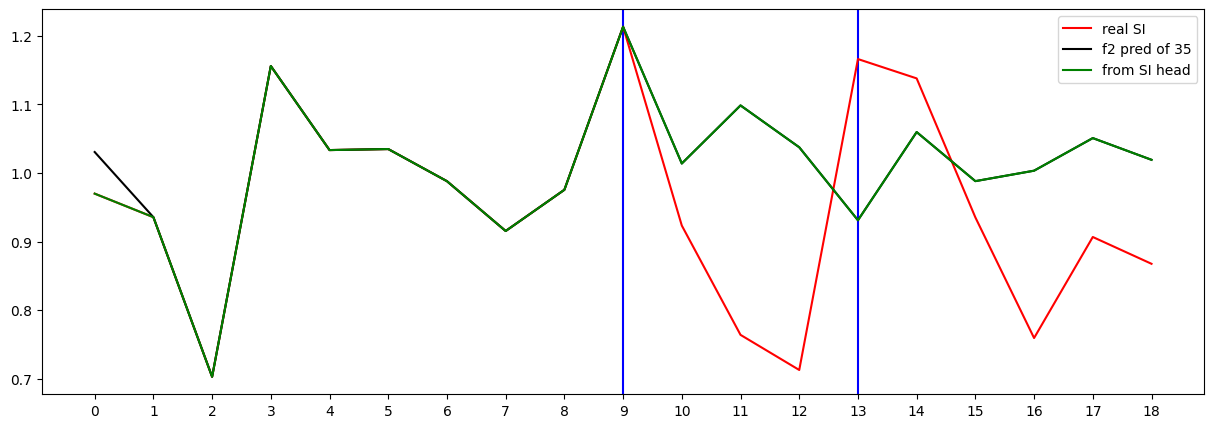

Testing R**2 - (all) - (no inputs):  0.9911508111273339
Testing R**2 - (f2) - SI full (no inputs):  -0.8592161868247379
Testing R**2 - SI head only (no inputs):  -0.8592161868247379
0 ...index R**2 (no inputs):  -0.008270395219438065
1 ...index R**2 (no inputs):  -0.9035473976142099
2 ...index R**2 (no inputs):  -0.8592161868247379
3 ...index R**2 (no inputs):  -6.680302366433539
4 ...index R**2 (no inputs):  -28.524401398444756
5 ...index R**2 (no inputs):  -2.173651749667407
6 ...index R**2 (no inputs):  -26.263597596134623
7 ...index R**2 (no inputs):  -0.12562511035960977
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2724452120158536
10 ...index R**2 (no inputs):  -2.296302989089858
11 ...index R**2 (no inputs):  -71.97937386141065
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5424062323829915
16 ...index R**2 (no inputs):  -0.5205194699757754
17 ...index R**2 (no input

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
      
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.204207
Loss_SI: 1.3762580156326294 Loss_all: 1.1975359916687012
===


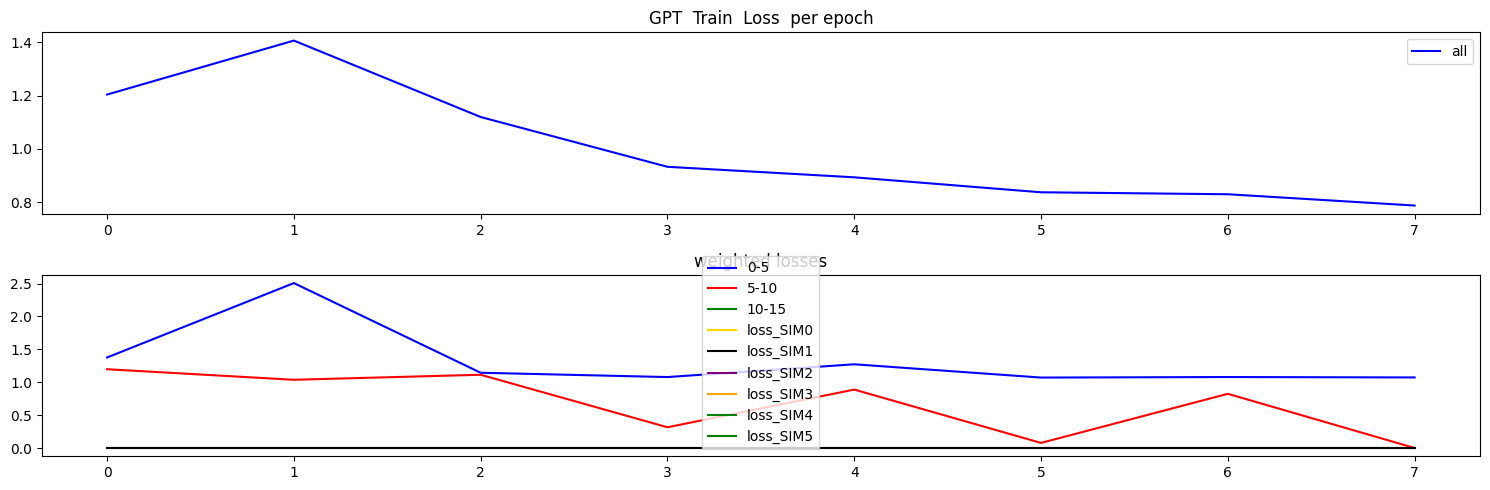

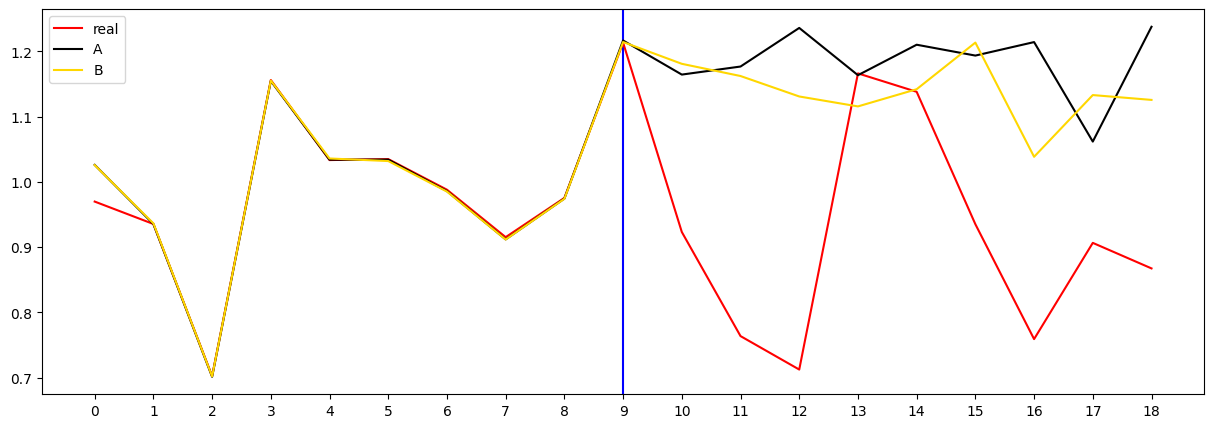

Which prediction is better? (A/B/skip): s


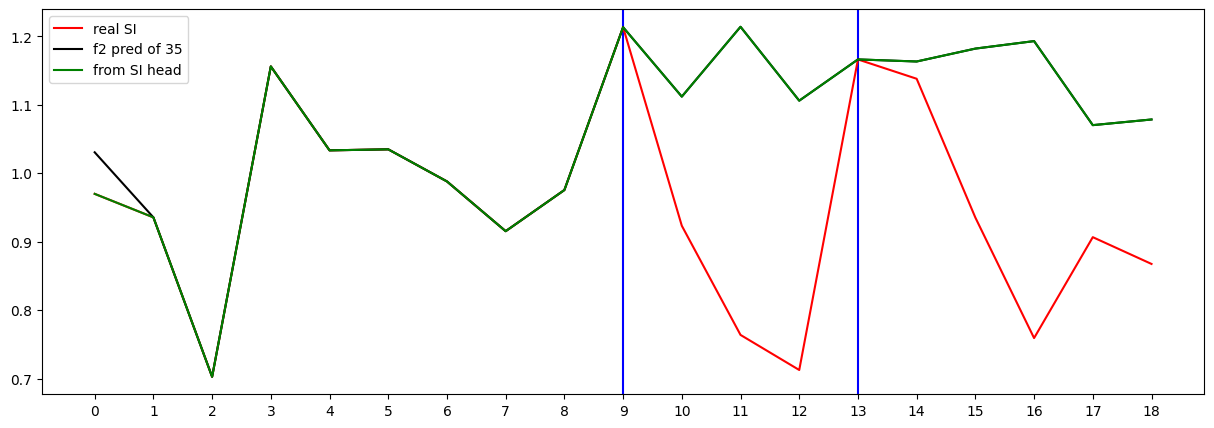

Testing R**2 - (all) - (no inputs):  0.9953481659310269
Testing R**2 - (f2) - SI full (no inputs):  -2.5939234828317286
Testing R**2 - SI head only (no inputs):  -2.5939234828317286
0 ...index R**2 (no inputs):  -0.31717246365290586
1 ...index R**2 (no inputs):  -1.4706948665374777
2 ...index R**2 (no inputs):  -2.5939234828317286
3 ...index R**2 (no inputs):  -3.230612990562748
4 ...index R**2 (no inputs):  -1.9572063353814153
5 ...index R**2 (no inputs):  -0.6930712226183156
6 ...index R**2 (no inputs):  -5.182462672688603
7 ...index R**2 (no inputs):  -0.025903690366026577
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7000676306034377
10 ...index R**2 (no inputs):  0.10201912003856839
11 ...index R**2 (no inputs):  -94.43311346005976
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4201224579839036
16 ...index R**2 (no inputs):  -1.0310733999061377
17 ...index R**2 (no inpu

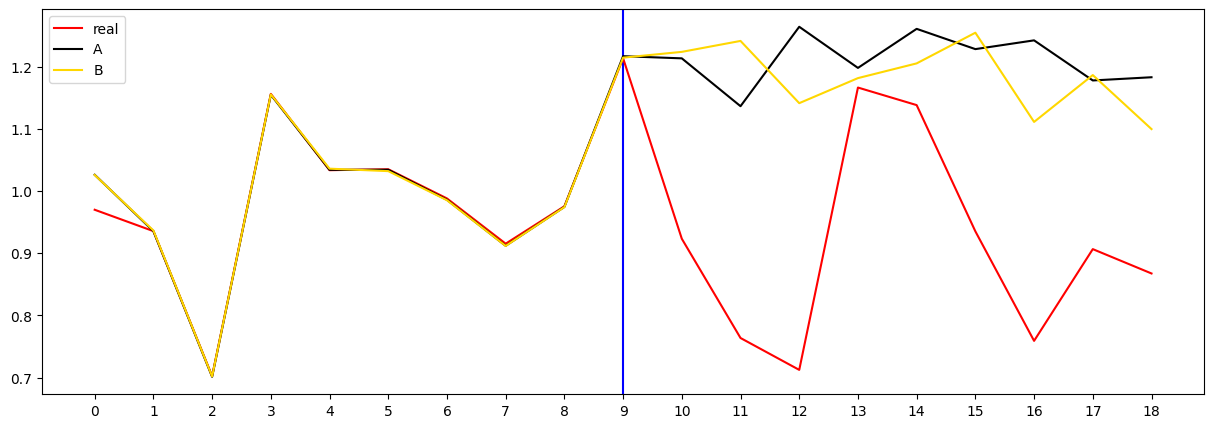

Which prediction is better? (A/B/skip): s


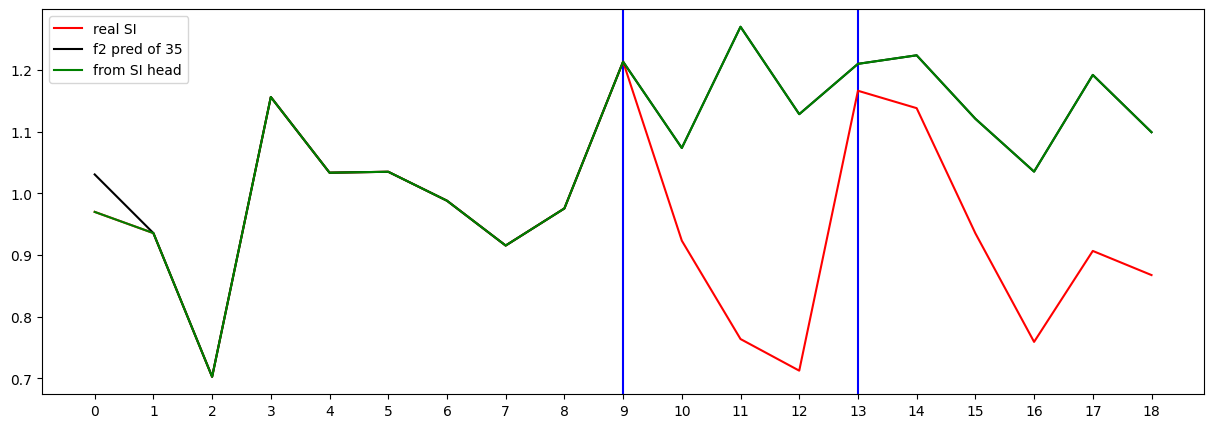

Testing R**2 - (all) - (no inputs):  0.9936978542926727
Testing R**2 - (f2) - SI full (no inputs):  -2.704251783723026
Testing R**2 - SI head only (no inputs):  -2.704251783723026
0 ...index R**2 (no inputs):  -0.26386848814569963
1 ...index R**2 (no inputs):  -0.36314940999815937
2 ...index R**2 (no inputs):  -2.704251783723026
3 ...index R**2 (no inputs):  -12.25880648826537
4 ...index R**2 (no inputs):  -20.38922380099919
5 ...index R**2 (no inputs):  -1.2866115823634034
6 ...index R**2 (no inputs):  -25.087118946404637
7 ...index R**2 (no inputs):  -17.08660181367264
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9701117454945183
10 ...index R**2 (no inputs):  -2.878018167455867
11 ...index R**2 (no inputs):  -643.5187771763513
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7531646757641814
16 ...index R**2 (no inputs):  -0.2730825133904302
17 ...index R**2 (no inputs):  

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.230209
Loss_SI: 1.3984898328781128 Loss_all: 1.223623275756836
===


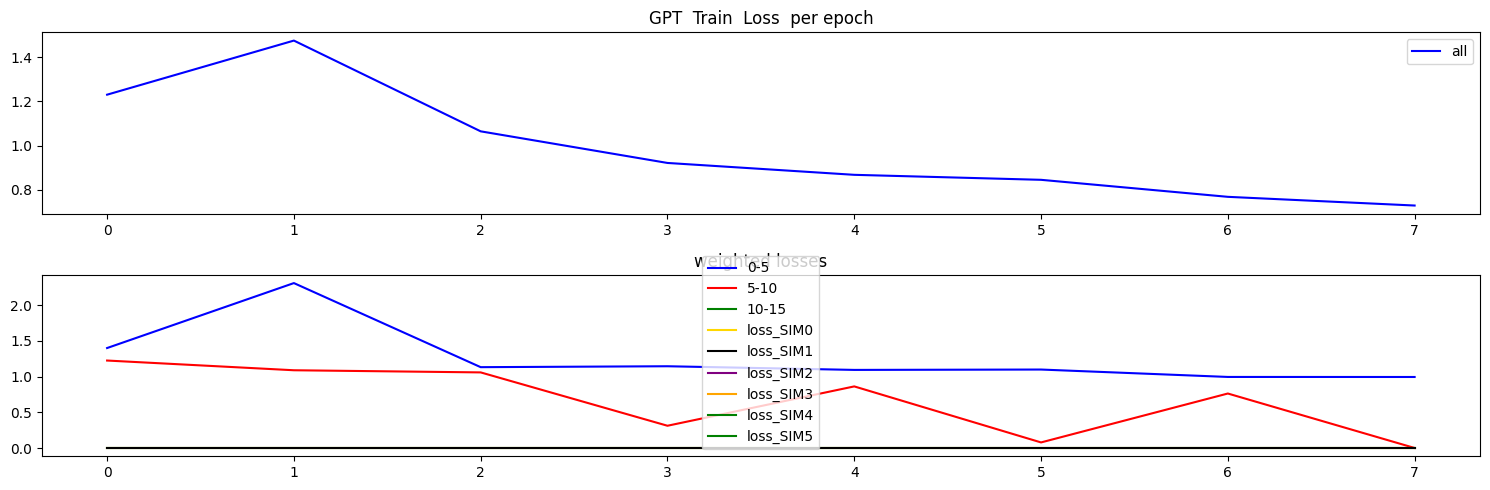

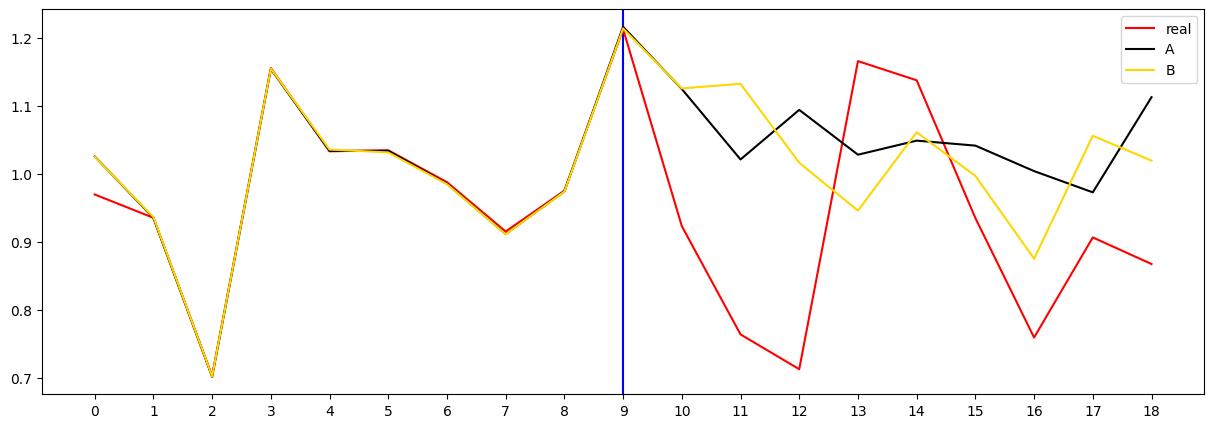

Which prediction is better? (A/B/skip): s


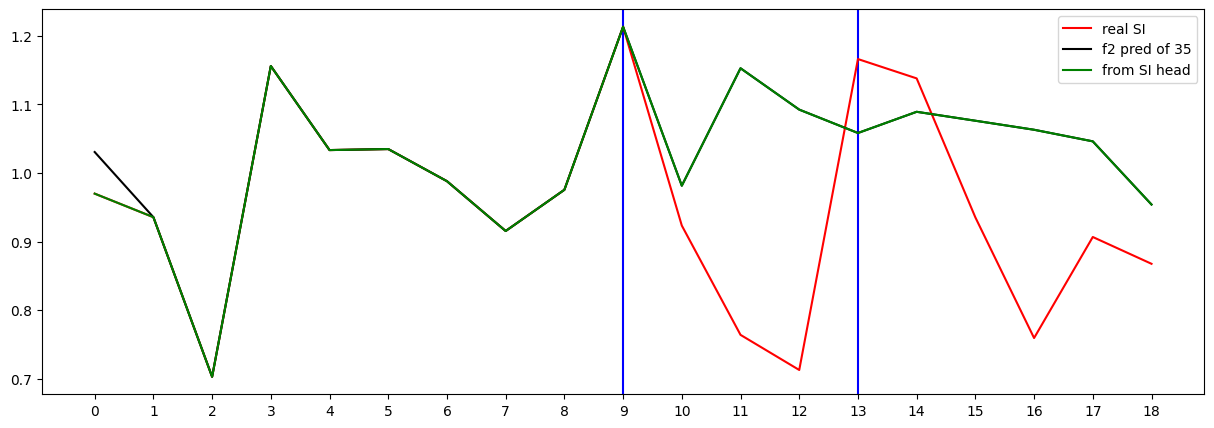

Testing R**2 - (all) - (no inputs):  0.9945111678742198
Testing R**2 - (f2) - SI full (no inputs):  -1.0993489582084175
Testing R**2 - SI head only (no inputs):  -1.0993489582084175
0 ...index R**2 (no inputs):  0.05936199249934515
1 ...index R**2 (no inputs):  -1.84669185494946
2 ...index R**2 (no inputs):  -1.0993489582084175
3 ...index R**2 (no inputs):  0.5104649367775564
4 ...index R**2 (no inputs):  -1.6829931384512054
5 ...index R**2 (no inputs):  -0.9620660576410924
6 ...index R**2 (no inputs):  -1.9237052101402057
7 ...index R**2 (no inputs):  -5.12927950451751
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4987404045575712
10 ...index R**2 (no inputs):  0.032430960788029206
11 ...index R**2 (no inputs):  -283.04131677445673
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.08045808261831222
16 ...index R**2 (no inputs):  -0.43217990824380204
17 ...index R**2 (no inputs)

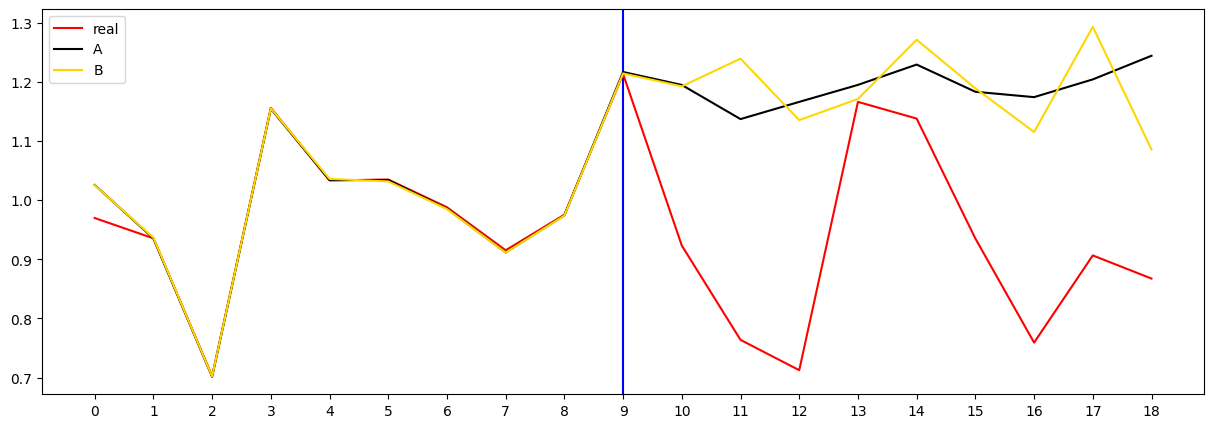

Which prediction is better? (A/B/skip): s


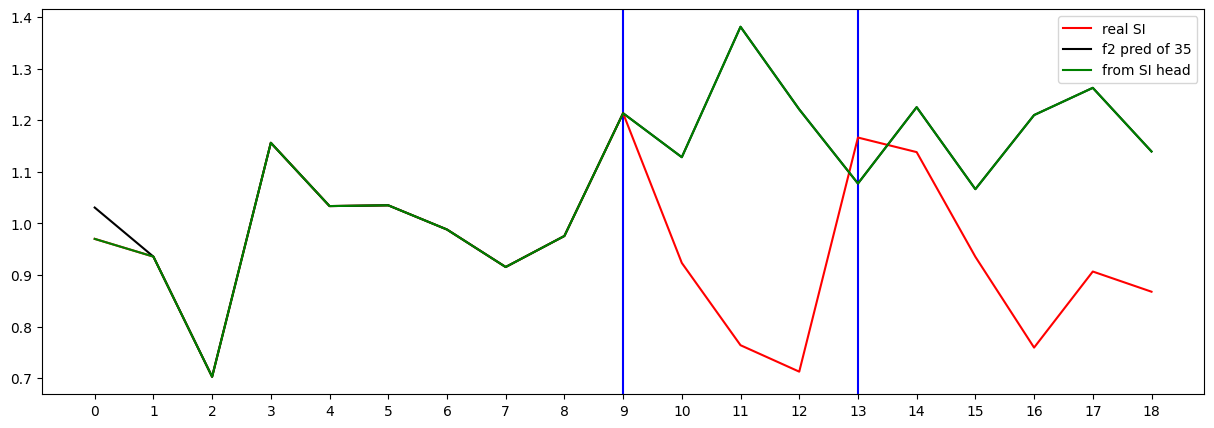

Testing R**2 - (all) - (no inputs):  0.9866327148308435
Testing R**2 - (f2) - SI full (no inputs):  -4.036914948790685
Testing R**2 - SI head only (no inputs):  -4.036914948790685
0 ...index R**2 (no inputs):  -0.401561345102736
1 ...index R**2 (no inputs):  -1.6994534579552
2 ...index R**2 (no inputs):  -4.036914948790685
3 ...index R**2 (no inputs):  -11.33489473542972
4 ...index R**2 (no inputs):  -61.66345407115337
5 ...index R**2 (no inputs):  -3.92953404085023
6 ...index R**2 (no inputs):  -22.740070702894588
7 ...index R**2 (no inputs):  -100.3122761808572
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5472632696457538
10 ...index R**2 (no inputs):  -2.548724262156246
11 ...index R**2 (no inputs):  -36.11879235329569
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4370954849892073
16 ...index R**2 (no inputs):  -0.40044929228507575
17 ...index R**2 (no inputs):  -296.90

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.230783
Loss_SI: 1.308801293373108 Loss_all: 1.2242140769958496
===


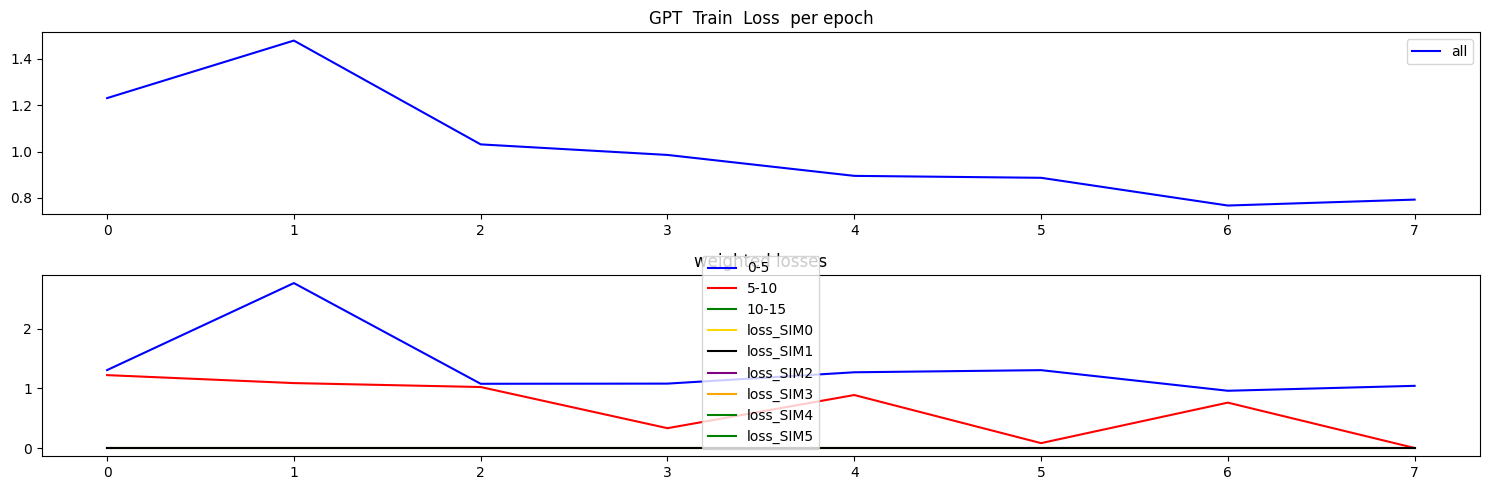

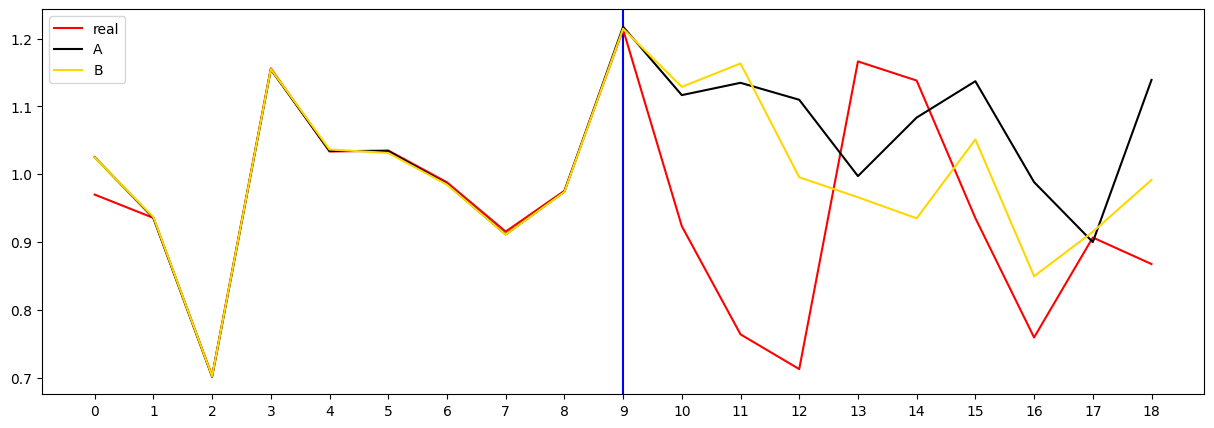

Which prediction is better? (A/B/skip): s


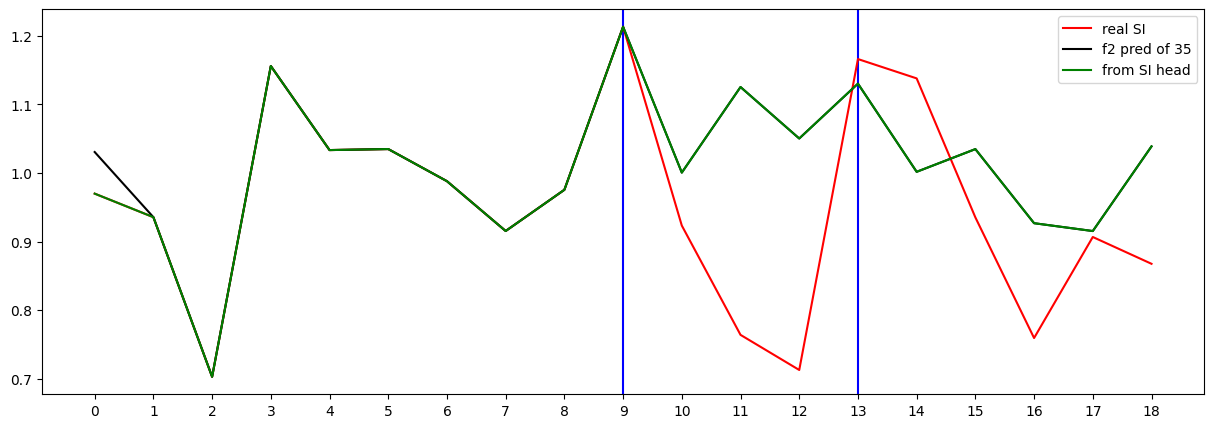

Testing R**2 - (all) - (no inputs):  0.996998010751112
Testing R**2 - (f2) - SI full (no inputs):  -0.586345410467155
Testing R**2 - SI head only (no inputs):  -0.586345410467155
0 ...index R**2 (no inputs):  0.07214814487872734
1 ...index R**2 (no inputs):  -1.609696957756737
2 ...index R**2 (no inputs):  -0.586345410467155
3 ...index R**2 (no inputs):  -0.10416508865261975
4 ...index R**2 (no inputs):  -6.951430221441309
5 ...index R**2 (no inputs):  -0.02053186507011162
6 ...index R**2 (no inputs):  -2.811816526421155
7 ...index R**2 (no inputs):  -8.411044357355648
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4308442009499749
10 ...index R**2 (no inputs):  -0.25253811314272334
11 ...index R**2 (no inputs):  -575.4793879982237
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9466465886125257
16 ...index R**2 (no inputs):  -0.3527898057349754
17 ...index R**2 (no inputs):  

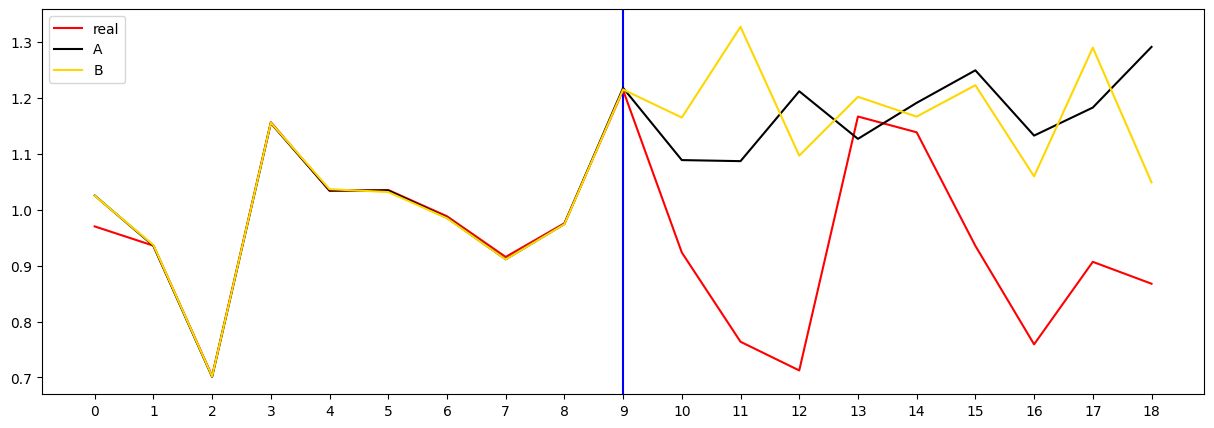

Which prediction is better? (A/B/skip): s


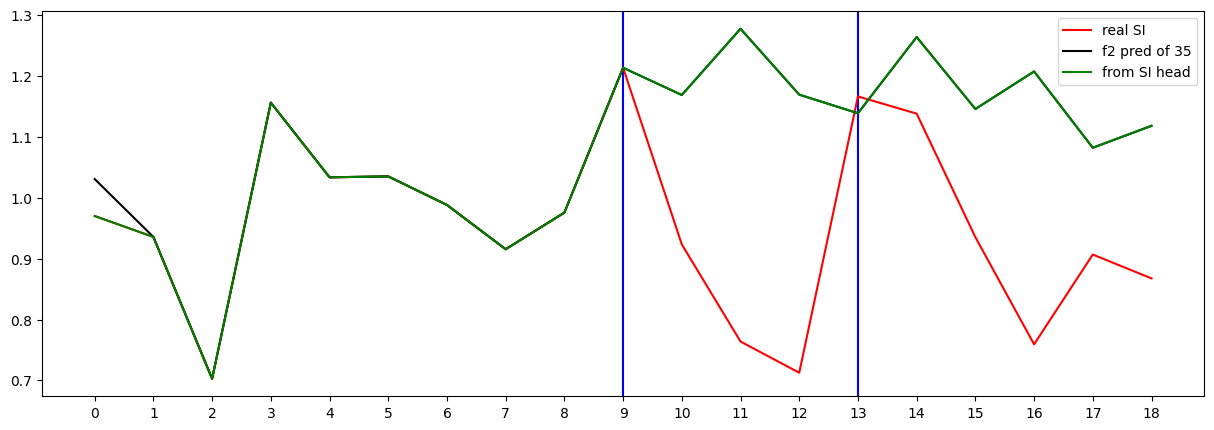

Testing R**2 - (all) - (no inputs):  0.9774478069790693
Testing R**2 - (f2) - SI full (no inputs):  -3.3466104397134364
Testing R**2 - SI head only (no inputs):  -3.3466104397134364
0 ...index R**2 (no inputs):  0.026742978225367753
1 ...index R**2 (no inputs):  -1.340105279387049
2 ...index R**2 (no inputs):  -3.3466104397134364
3 ...index R**2 (no inputs):  -2.2919271909366516
4 ...index R**2 (no inputs):  -69.85128714771339
5 ...index R**2 (no inputs):  -7.330007775781265
6 ...index R**2 (no inputs):  -2.7384531484017893
7 ...index R**2 (no inputs):  -367.1101090849823
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3554852029112006
10 ...index R**2 (no inputs):  -4.04585581728361
11 ...index R**2 (no inputs):  -369.42747801361423
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.432347135993861
16 ...index R**2 (no inputs):  -0.458466079190607
17 ...index R**2 (no inputs):  -

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
  
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.189107
Loss_SI: 1.3437223434448242 Loss_all: 1.182446002960205
===


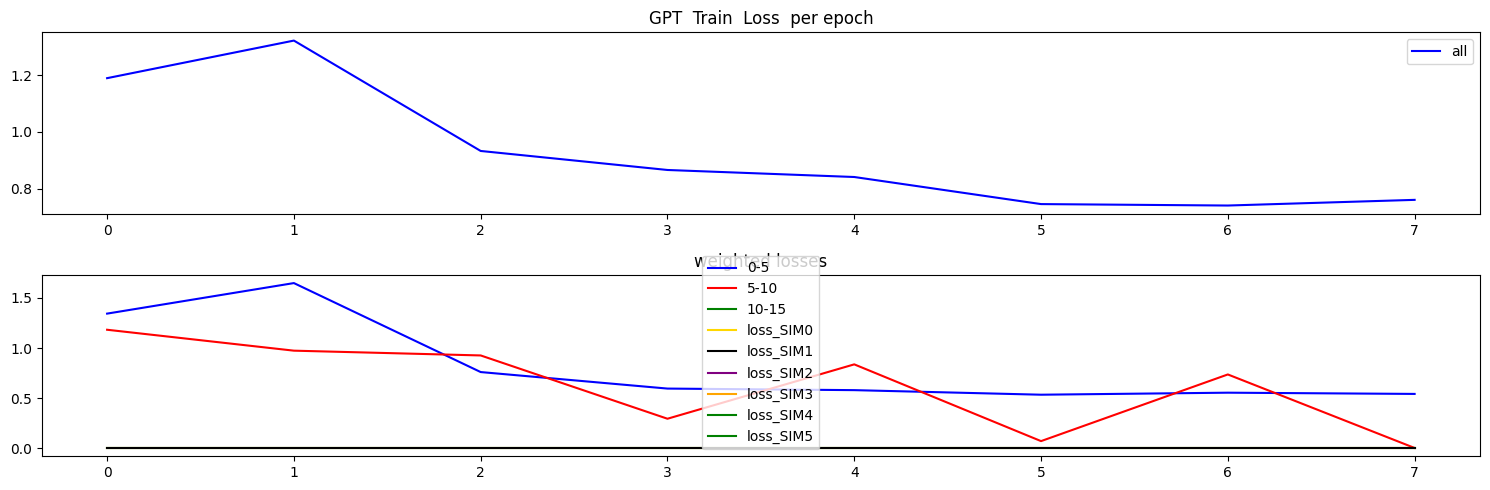

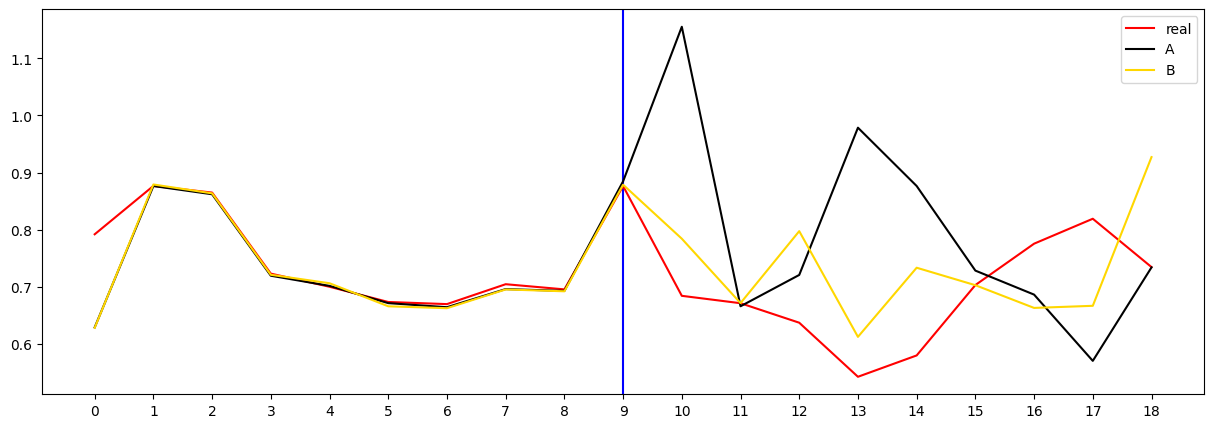

Which prediction is better? (A/B/skip): b
Saved preference.


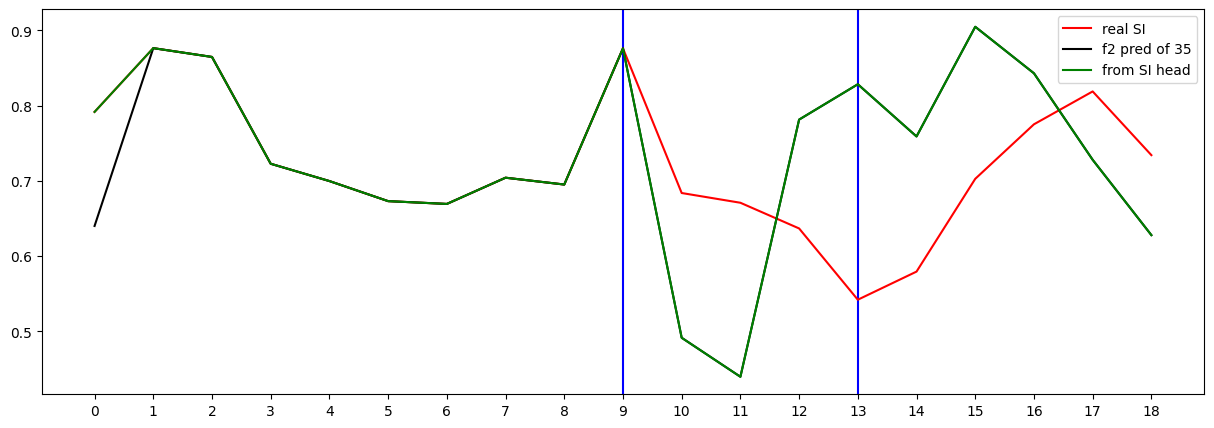

Testing R**2 - (all) - (no inputs):  0.9882583374303147
Testing R**2 - (f2) - SI full (no inputs):  -2.2375746613970944
Testing R**2 - SI head only (no inputs):  -2.2375746613970944
0 ...index R**2 (no inputs):  -3.047909879969736
1 ...index R**2 (no inputs):  -3.016263730104578
2 ...index R**2 (no inputs):  -2.2375746613970944
3 ...index R**2 (no inputs):  -26.566255082861648
4 ...index R**2 (no inputs):  -13.554850801626085
5 ...index R**2 (no inputs):  -3.5813618473674973
6 ...index R**2 (no inputs):  -33.31443013829226
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1236391228294327
10 ...index R**2 (no inputs):  -1.3515518980053507
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.09864154057669872
16 ...index R**2 (no inputs):  -3.9071415505943987
17 ...index R**2 (no inputs):  -238.34262237548828
18 ...in

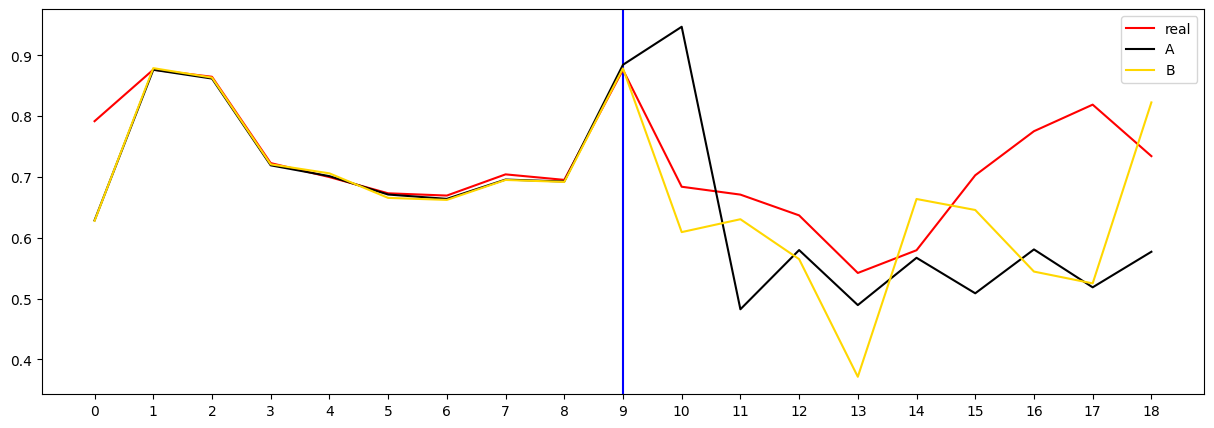

Which prediction is better? (A/B/skip): b
Saved preference.


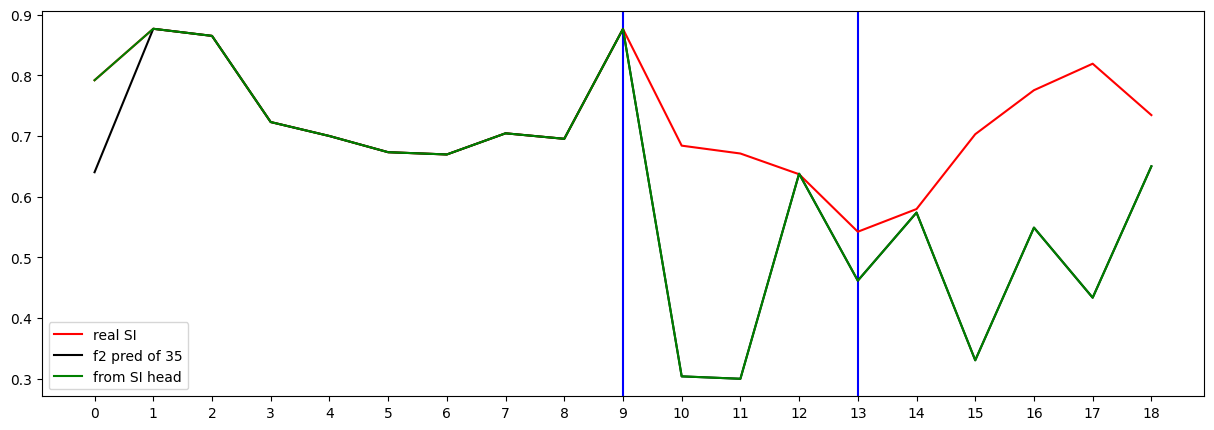

Testing R**2 - (all) - (no inputs):  0.9853427361498687
Testing R**2 - (f2) - SI full (no inputs):  -8.117342237777923
Testing R**2 - SI head only (no inputs):  -8.117342237777923
0 ...index R**2 (no inputs):  -2.256201061591258
1 ...index R**2 (no inputs):  -2.86698908405191
2 ...index R**2 (no inputs):  -8.117342237777923
3 ...index R**2 (no inputs):  -6.295277320531247
4 ...index R**2 (no inputs):  -221.23688194796046
5 ...index R**2 (no inputs):  -4.667010280303949
6 ...index R**2 (no inputs):  -2105.301432280427
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.767187659943711
10 ...index R**2 (no inputs):  -9.687472605759043
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.3795876050706877
16 ...index R**2 (no inputs):  -2.6367018886311793
17 ...index R**2 (no inputs):  -377.71972707112633
18 ...index R**2 

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.228107
Loss_SI: 1.3377352952957153 Loss_all: 1.221388816833496
===


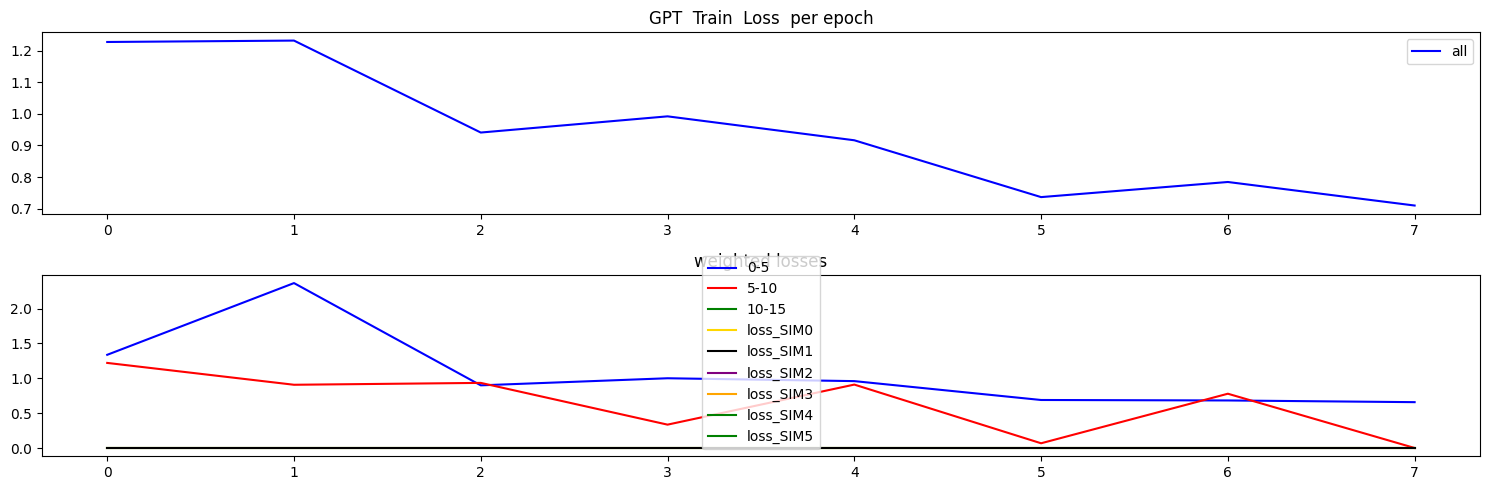

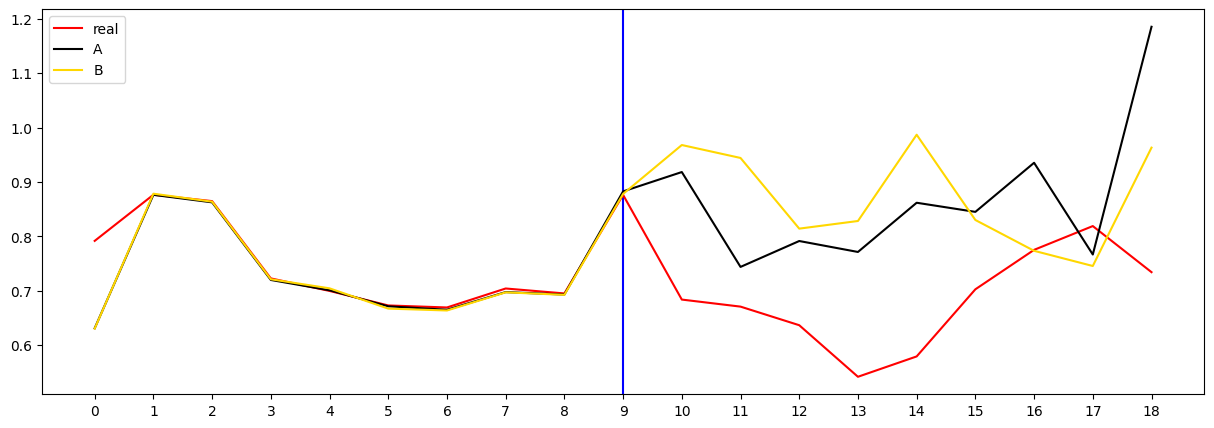

Which prediction is better? (A/B/skip): a
Saved preference.


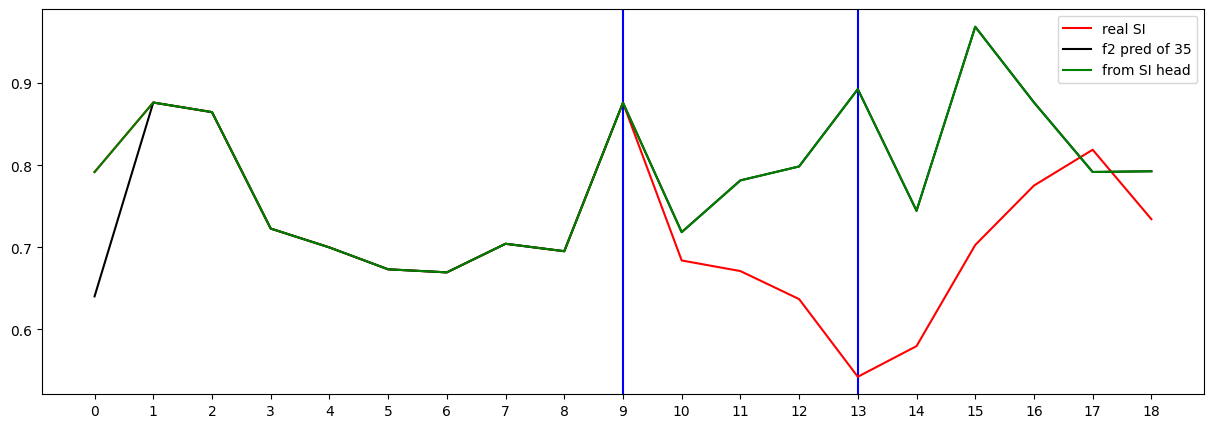

Testing R**2 - (all) - (no inputs):  0.9867238452067775
Testing R**2 - (f2) - SI full (no inputs):  -2.1720458828580296
Testing R**2 - SI head only (no inputs):  -2.1720458828580296
0 ...index R**2 (no inputs):  -2.0908209575696515
1 ...index R**2 (no inputs):  -0.8476150755522656
2 ...index R**2 (no inputs):  -2.1720458828580296
3 ...index R**2 (no inputs):  -17.236517575637848
4 ...index R**2 (no inputs):  -8.365461476534973
5 ...index R**2 (no inputs):  -4.133789414697332
6 ...index R**2 (no inputs):  -505.02851469274555
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.587056137538064
10 ...index R**2 (no inputs):  -0.20574287034743177
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.35657493258672
16 ...index R**2 (no inputs):  -36.61473659819145
17 ...index R**2 (no inputs):  -2280.801171875
18 ...index R**

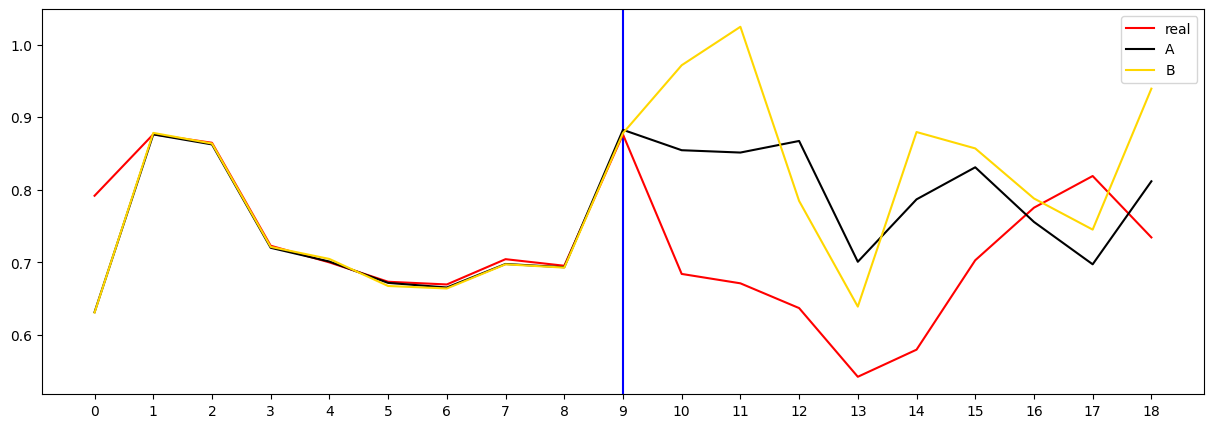

Which prediction is better? (A/B/skip): s


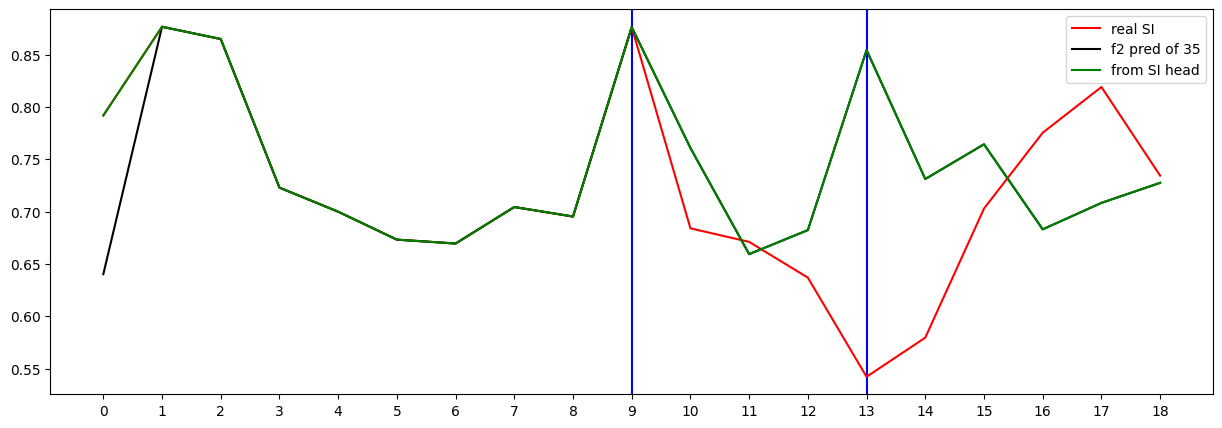

Testing R**2 - (all) - (no inputs):  0.9951649043162157
Testing R**2 - (f2) - SI full (no inputs):  -0.7417016412205892
Testing R**2 - SI head only (no inputs):  -0.7417016412205892
0 ...index R**2 (no inputs):  -3.025751153994019
1 ...index R**2 (no inputs):  -1.6566408787602778
2 ...index R**2 (no inputs):  -0.7417016412205892
3 ...index R**2 (no inputs):  -7.265851109344865
4 ...index R**2 (no inputs):  -145.64980769592106
5 ...index R**2 (no inputs):  -0.8215212957909626
6 ...index R**2 (no inputs):  -3081.328717419017
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -7.107543061098953
10 ...index R**2 (no inputs):  -8.709087121021676
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.55052494667777
16 ...index R**2 (no inputs):  -19.940247638010028
17 ...index R**2 (no inputs):  -335.2120754400889
18 ...index R*

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.358490
Loss_SI: 2.0034940242767334 Loss_all: 1.3517943620681763
===


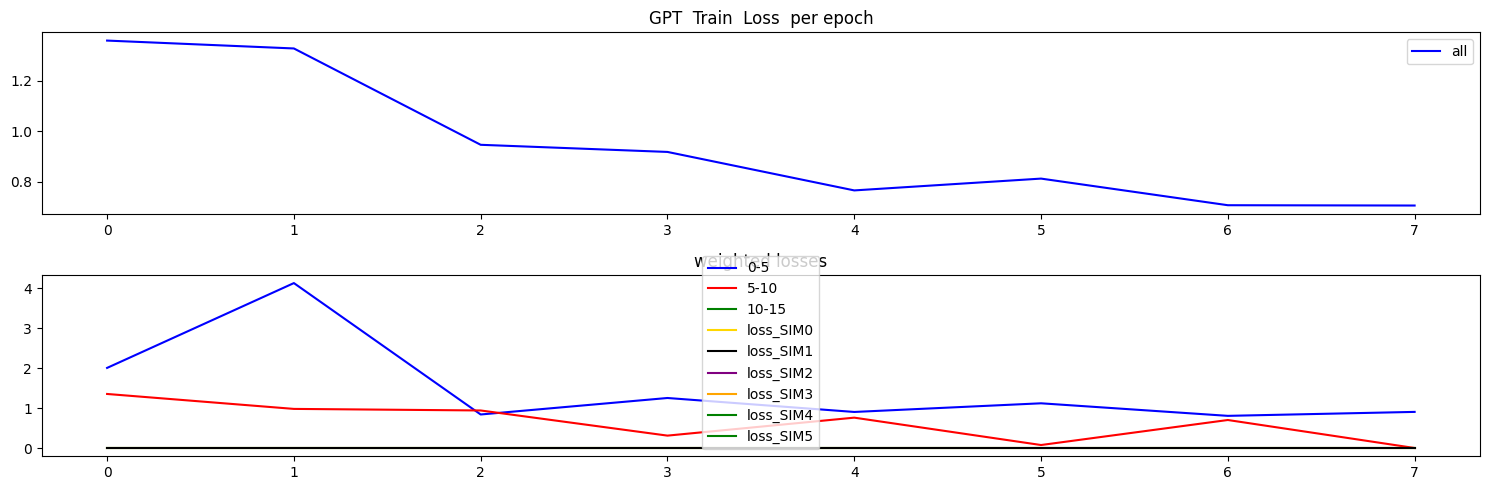

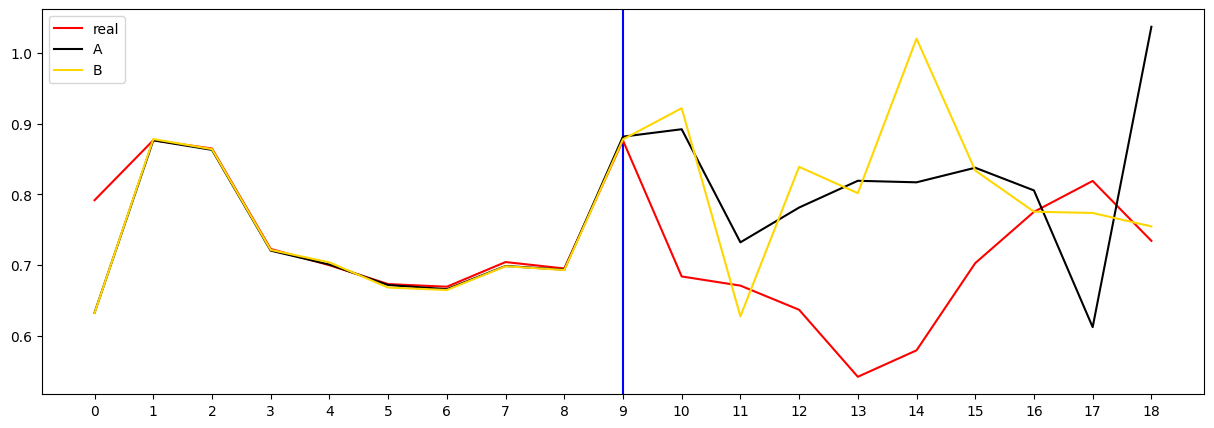

Which prediction is better? (A/B/skip): s


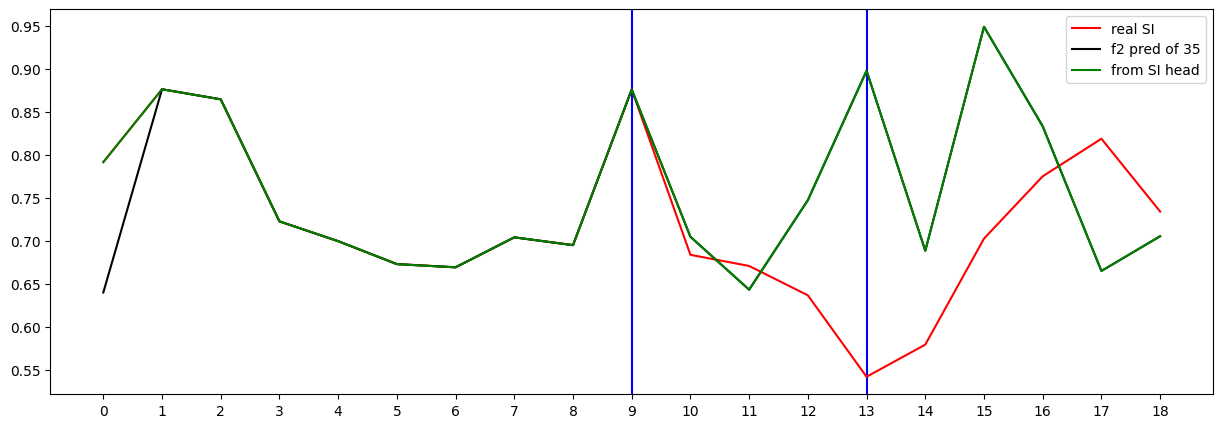

Testing R**2 - (all) - (no inputs):  0.9974515392729152
Testing R**2 - (f2) - SI full (no inputs):  -1.555375748847367
Testing R**2 - SI head only (no inputs):  -1.555375748847367
0 ...index R**2 (no inputs):  -1.2345791148698249
1 ...index R**2 (no inputs):  -0.8942841519427447
2 ...index R**2 (no inputs):  -1.555375748847367
3 ...index R**2 (no inputs):  -63.35701423228285
4 ...index R**2 (no inputs):  -318.66284554862324
5 ...index R**2 (no inputs):  0.03504793269739315
6 ...index R**2 (no inputs):  -723.6207824689188
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.443531095400931
10 ...index R**2 (no inputs):  -0.5167291080523291
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2853034496264142
16 ...index R**2 (no inputs):  -38.73168219931212
17 ...index R**2 (no inputs):  -588.9029052734375
18 ...index R*

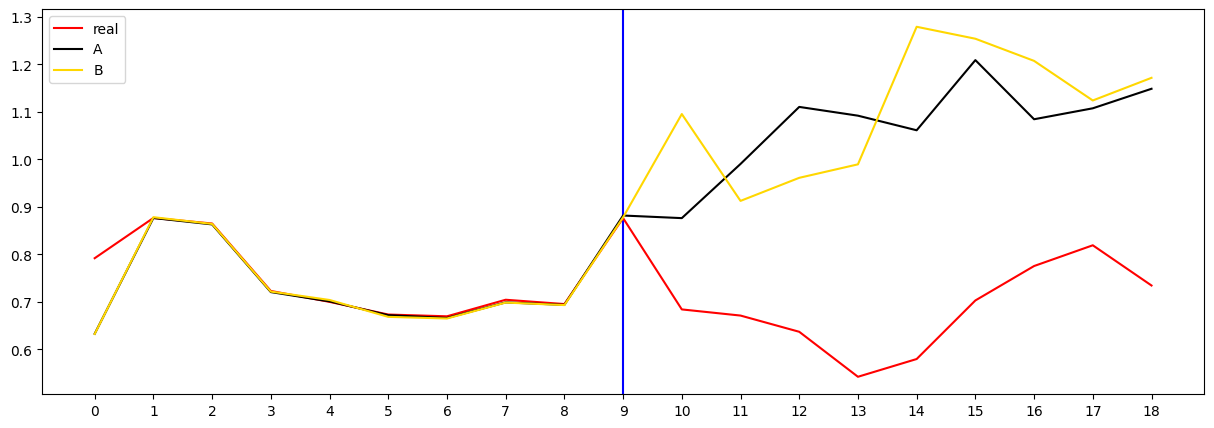

Which prediction is better? (A/B/skip): s


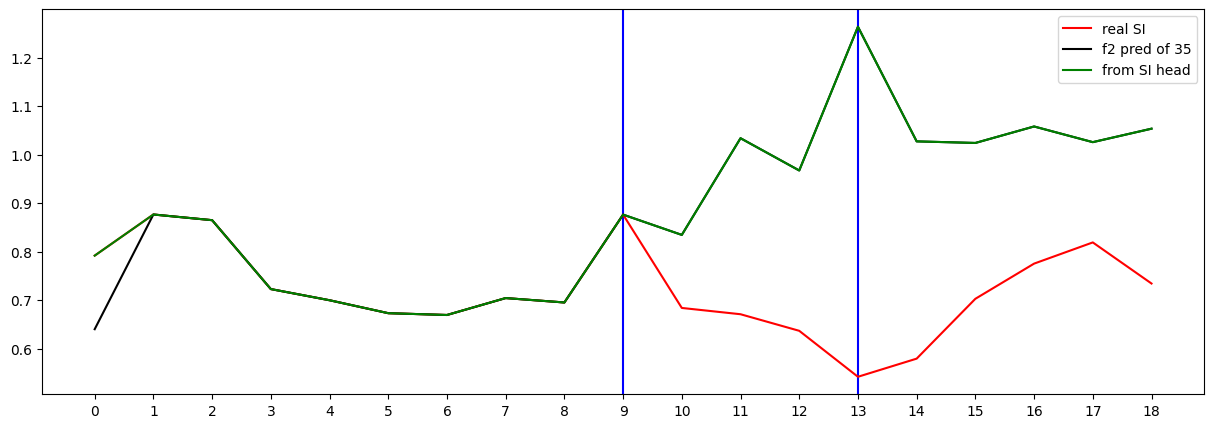

Testing R**2 - (all) - (no inputs):  0.9490074844210412
Testing R**2 - (f2) - SI full (no inputs):  -15.471793938669169
Testing R**2 - SI head only (no inputs):  -15.471793938669169
0 ...index R**2 (no inputs):  -0.9815582755932062
1 ...index R**2 (no inputs):  0.11947695363934863
2 ...index R**2 (no inputs):  -15.471793938669169
3 ...index R**2 (no inputs):  -1822.1213721612207
4 ...index R**2 (no inputs):  -6978.82685800083
5 ...index R**2 (no inputs):  -18.51127210212983
6 ...index R**2 (no inputs):  -555.4739006097611
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -10.493459825954247
10 ...index R**2 (no inputs):  -15.123883754109293
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8587560029049932
16 ...index R**2 (no inputs):  -18.91688076207854
17 ...index R**2 (no inputs):  -8684.418741861979
18 ...index 

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.276539
Loss_SI: 1.4528816938400269 Loss_all: 1.2699028253555298
===


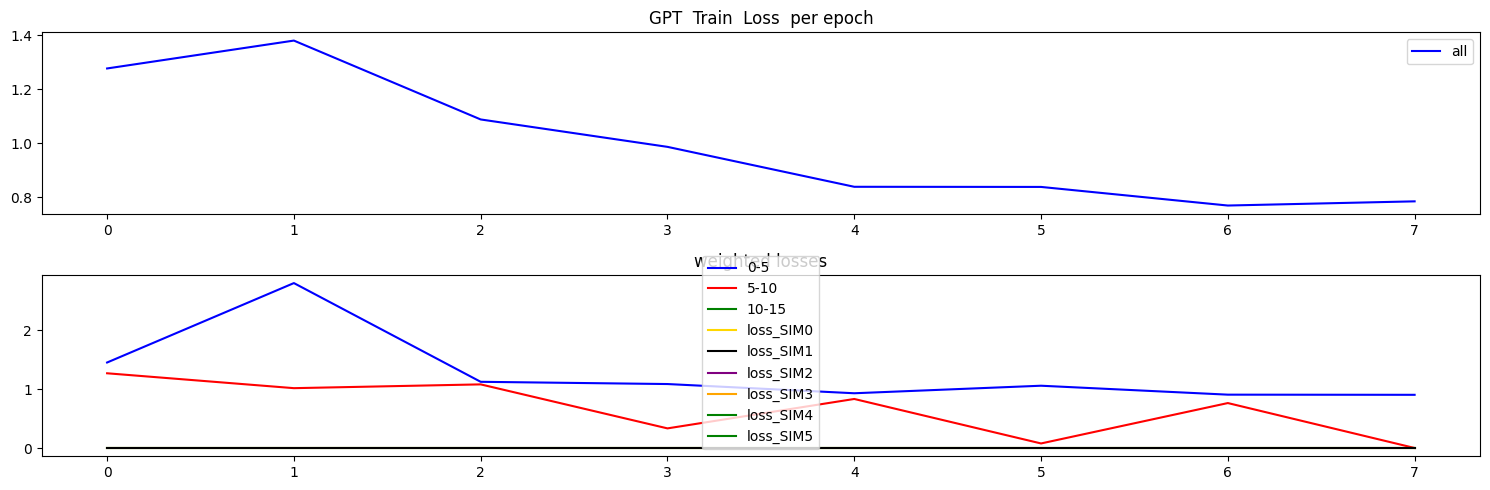

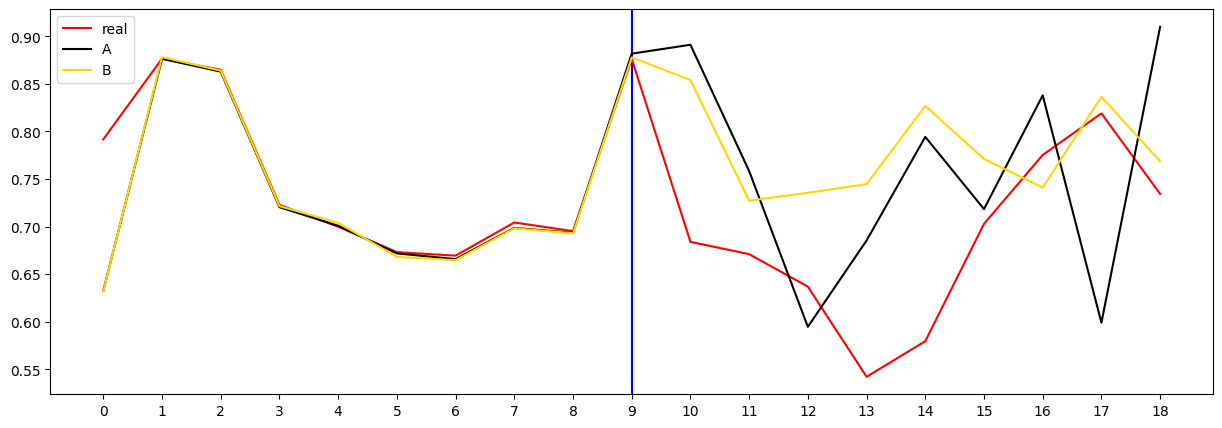

Which prediction is better? (A/B/skip): s


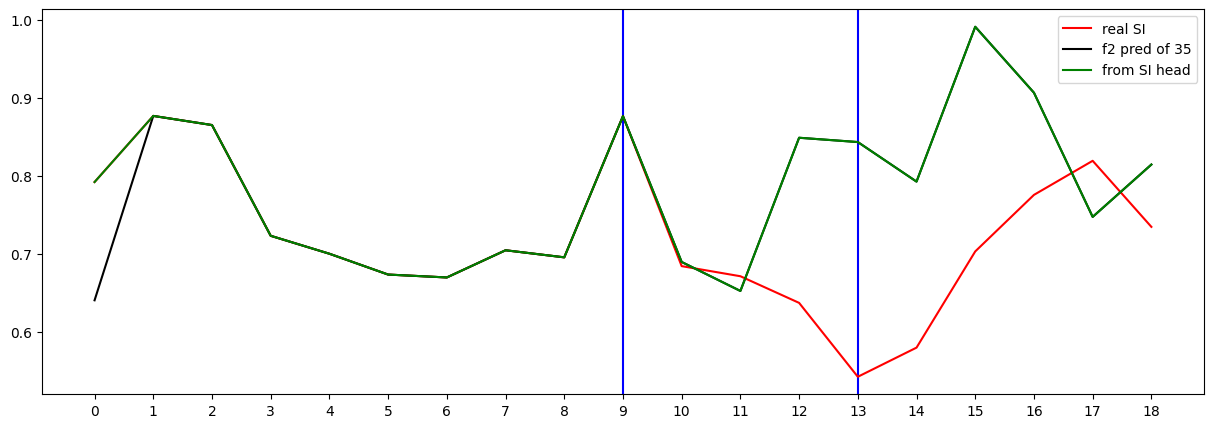

Testing R**2 - (all) - (no inputs):  0.9966940158271189
Testing R**2 - (f2) - SI full (no inputs):  -2.085216290630662
Testing R**2 - SI head only (no inputs):  -2.085216290630662
0 ...index R**2 (no inputs):  -1.859110056441653
1 ...index R**2 (no inputs):  -4.79275870211898
2 ...index R**2 (no inputs):  -2.085216290630662
3 ...index R**2 (no inputs):  -269.4787735512896
4 ...index R**2 (no inputs):  -94.98141192233803
5 ...index R**2 (no inputs):  -0.2659346909741034
6 ...index R**2 (no inputs):  -255.07212917809358
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.0498229526329887
10 ...index R**2 (no inputs):  -0.6209014952147691
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8145743806462051
16 ...index R**2 (no inputs):  -37.30721206011249
17 ...index R**2 (no inputs):  -418.5061105728149
18 ...index R**2

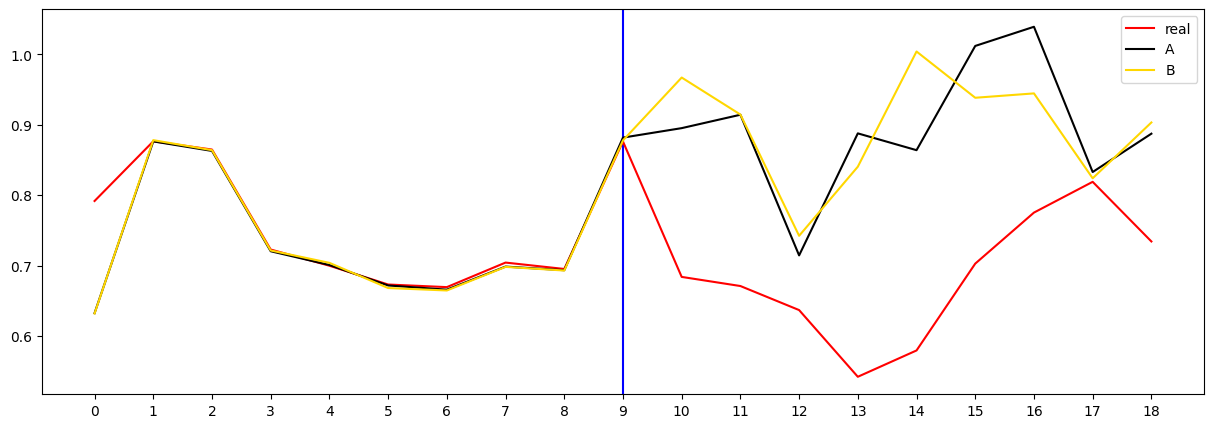

Which prediction is better? (A/B/skip): s


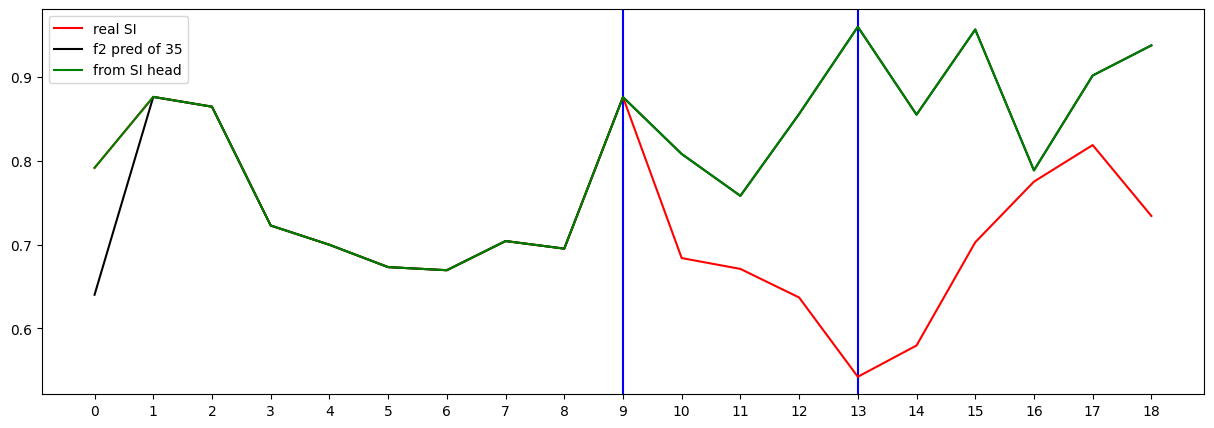

Testing R**2 - (all) - (no inputs):  0.9794708606848317
Testing R**2 - (f2) - SI full (no inputs):  -4.227491595705973
Testing R**2 - SI head only (no inputs):  -4.227491595705973
0 ...index R**2 (no inputs):  -3.3650503172888175
1 ...index R**2 (no inputs):  -2.8048474838665918
2 ...index R**2 (no inputs):  -4.227491595705973
3 ...index R**2 (no inputs):  -1007.9430438492427
4 ...index R**2 (no inputs):  -10310.24769214902
5 ...index R**2 (no inputs):  -6.373925922182224
6 ...index R**2 (no inputs):  -1186.3805861676865
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -7.128288049016799
10 ...index R**2 (no inputs):  -10.751604920277789
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.246137214308015
16 ...index R**2 (no inputs):  -49.259849707473414
17 ...index R**2 (no inputs):  -12832.133528645832
18 ...index R

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.283393
Loss_SI: 1.2662957906723022 Loss_all: 1.2767447233200073
===


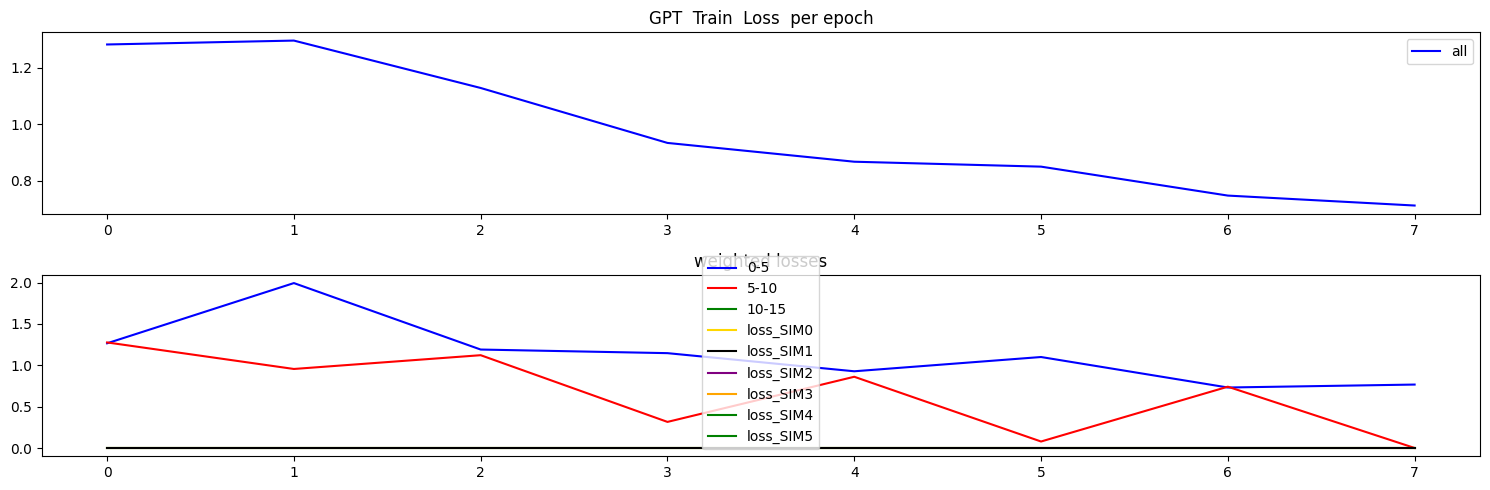

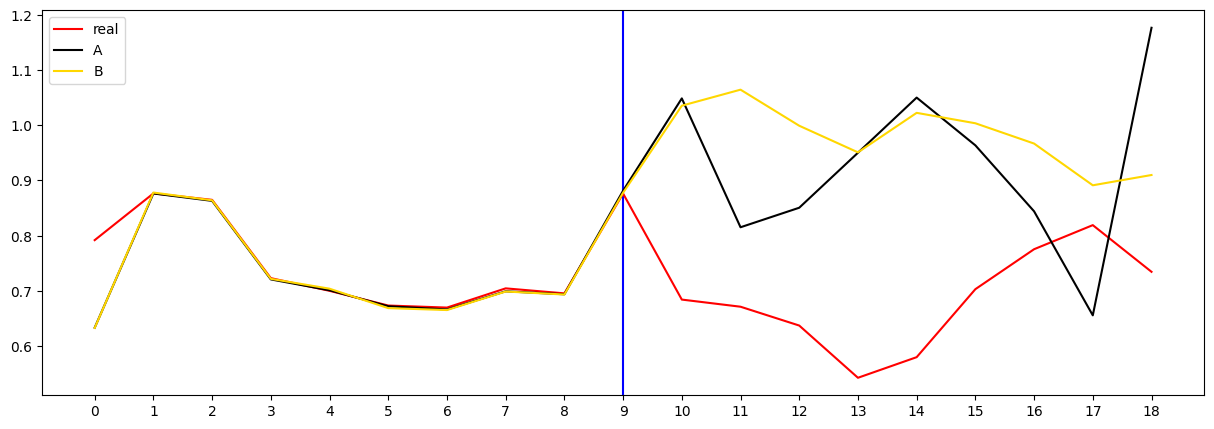

Which prediction is better? (A/B/skip): a
Saved preference.


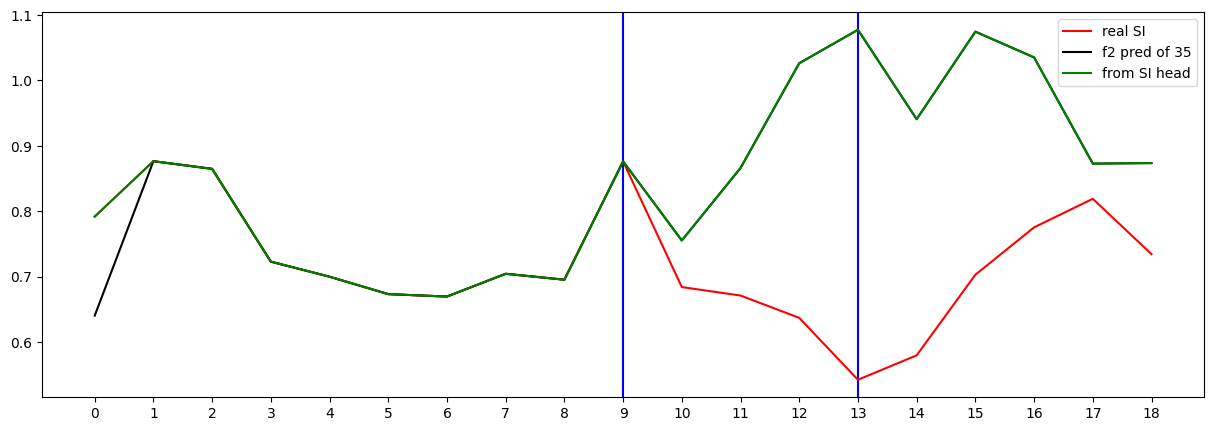

Testing R**2 - (all) - (no inputs):  0.9969811749587283
Testing R**2 - (f2) - SI full (no inputs):  -9.364030964931128
Testing R**2 - SI head only (no inputs):  -9.364030964931128
0 ...index R**2 (no inputs):  -1.2739468746012652
1 ...index R**2 (no inputs):  -0.984749198322904
2 ...index R**2 (no inputs):  -9.364030964931128
3 ...index R**2 (no inputs):  -65.87334123737209
4 ...index R**2 (no inputs):  -215.31547507290537
5 ...index R**2 (no inputs):  -0.10072245851856088
6 ...index R**2 (no inputs):  -2105.9719229028856
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.038884544699041
10 ...index R**2 (no inputs):  -0.30207273468047235
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.3684953663610884
16 ...index R**2 (no inputs):  -21.31217557613721
17 ...index R**2 (no inputs):  -2509.499189758301
18 ...index 

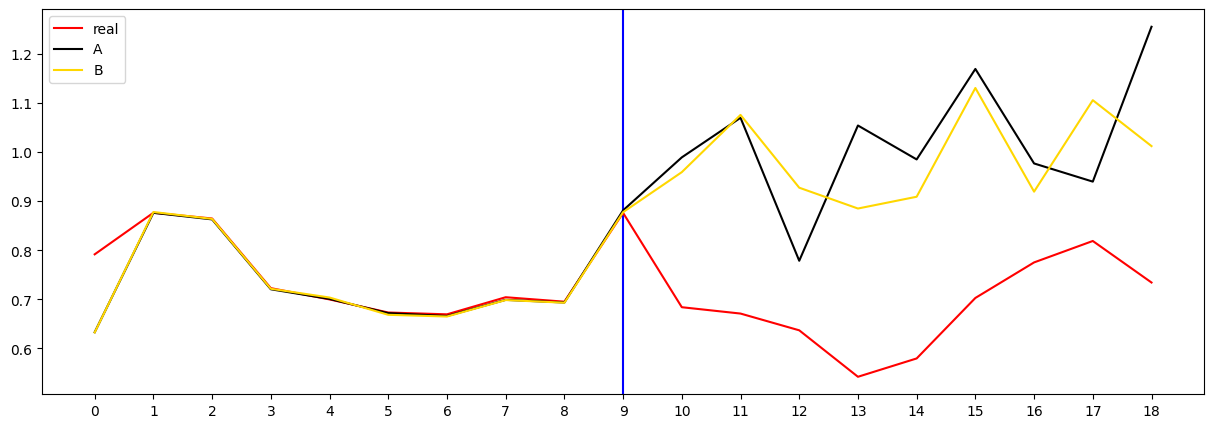

Which prediction is better? (A/B/skip): s


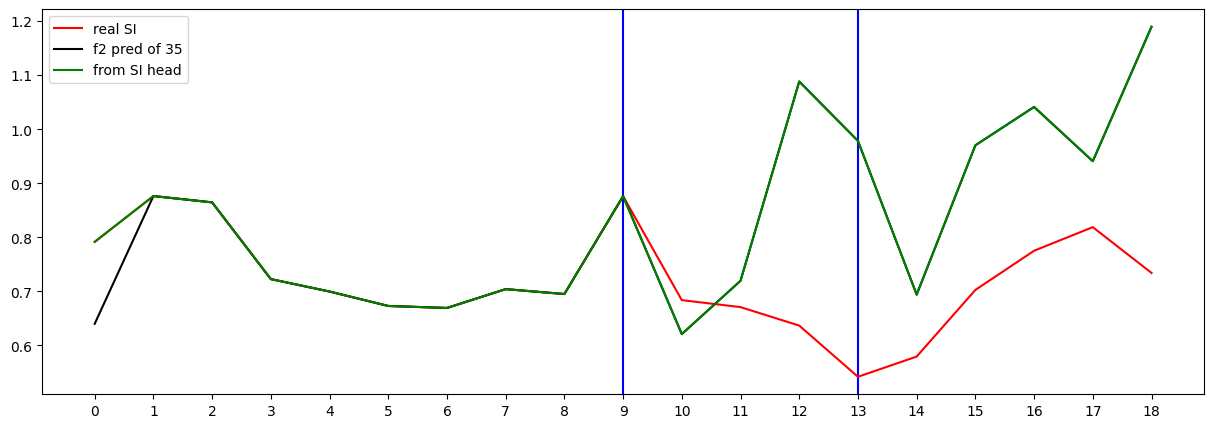

Testing R**2 - (all) - (no inputs):  0.9865904802143856
Testing R**2 - (f2) - SI full (no inputs):  -9.28864997781295
Testing R**2 - SI head only (no inputs):  -9.28864997781295
0 ...index R**2 (no inputs):  -9.166660126052777
1 ...index R**2 (no inputs):  -0.6934100054812655
2 ...index R**2 (no inputs):  -9.28864997781295
3 ...index R**2 (no inputs):  -159.52836983598607
4 ...index R**2 (no inputs):  -3201.542330047543
5 ...index R**2 (no inputs):  -3.988222904696215
6 ...index R**2 (no inputs):  -766.0230144259832
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -19.979395571579396
10 ...index R**2 (no inputs):  -4.575367803326608
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8411851614559844
16 ...index R**2 (no inputs):  -6.073984324352317
17 ...index R**2 (no inputs):  -4189.572481791179
18 ...index R**2 (n

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [43]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: 0.1353825455655162
Naive_R2:....................................R²: 0.2731
RMSE:0.1685,MAE:0.1544,MASE:0.7313
1 .......................R² on just step n - R²: 0.1353825455655162
Naive_R2:....................................R²: 0.2731
RMSE:0.1685,MAE:0.1544,MASE:0.7313
2 .....................R² on first n steps - R²: -0.5231869902293287
Naive_R2:....................................R²: -3.0113
RMSE:0.2061,MAE:0.1801,MASE:1.9733
2 .......................R² on just step n - R²: -1.7483084844170738
Naive_R2:....................................R²: -1.3252
RMSE:0.2379,MAE:0.2058,MASE:1.2284
3 .....................R² on first n steps - R²: 0.15993901237224883
Naive_R2:....................................R²: 0.3798
RMSE:0.1907,MAE:0.1652,MASE:0.8898
3 .......................R² on just step n - R²: 0.6487315113420402
Naive_R2:....................................R²: 0.8284
RMSE:0.1554,MAE:0.1354,MASE:0.3

In [44]:

print("End")


End
